 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b>

Здравствуй Александр!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ок, это хороший тон - дать описание проблематики.

<div class="alert alert-info">
<font color='black'> <b> План работы:<br/>
1)Провести анализ входных данных. Подготовить данные (определить, в каких данных есть пропущенные значения, аномальные значения и как их обработать)<br/> Изменить типы данных.<br/>
2)Подготовить признаки. Составить общую таблицу и выделить целевой признак как последний замер температуры в серии замеров. Оценить полученные признаки на предмет корреляции. Разделить на features и target со смешиванием данных.<br/>
3)Разделить полученный датасет на тренировочную, валидационную и тестовую выборки. Выбрать модель. Использовать и обучить регрессионные модели, например, CatBoostRegressor, LGBMRegressor<br/>
4)Оценить эффективность лучшей модели на тестовой выборке.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>    
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).

## Анализ входных данных

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler 


warnings.filterwarnings('ignore')

In [2]:
# Функция для поиска пропусков и дубликатов

def sum_isna_duplicatated(x):
    return x.isna().sum(), f'сумма дубликатов - {x.duplicated().sum()}' 

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Тут сам вставил. Но лучше бы сделать некий автомат загрузка для локального компа и для сервера. Например, конструкция try - except..</p>
    <div class="alert alert-info"> <b>Комментарий студента:</b> Сделал вроде. Тупой вопрос: А как прописать в локальной тетрадке открытие файла с тренажера? он его не откроет никак ведь? ссылка неполная</div>


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК, увидел. Нормальнй вопрос! Просто я же тетрадку открываю на сревере не на своей локалке. Поэтому этот путь подходит.

In [3]:
try:
    data_arc = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_gas.csv')
    data_temp = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_temp.csv')
    data_wire = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('C:/Users/Alex/Desktop/Data Science/ФИНАЛЬНЫЙ ПРОЕКТ/final_steel/data_wire_time.csv')
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [4]:
data_arc.info()
data_arc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [5]:
sum_isna_duplicatated(data_arc)

(key                     0
 Начало нагрева дугой    0
 Конец нагрева дугой     0
 Активная мощность       0
 Реактивная мощность     0
 dtype: int64,
 'сумма дубликатов - 0')

In [6]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Text(0, 0.5, 'Количество')

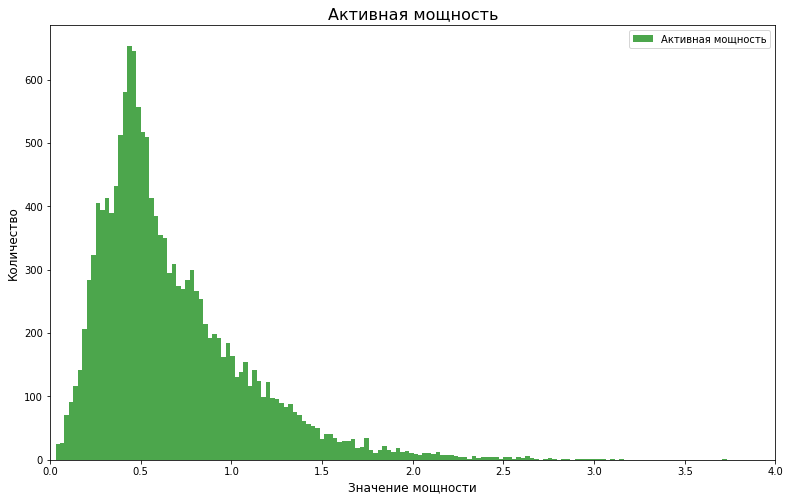

In [7]:
plt.figure(figsize=(13, 8))
plt.hist(data_arc['Активная мощность'], bins = 150, label = 'Активная мощность', color='green',  alpha=0.7)
plt.legend()
plt.title('Активная мощность', fontsize=16)
plt.xlim(0, 4)
plt.xlabel('Значение мощности',fontsize=12)
plt.ylabel('Количество',fontsize=12)

Text(0, 0.5, 'Количество')

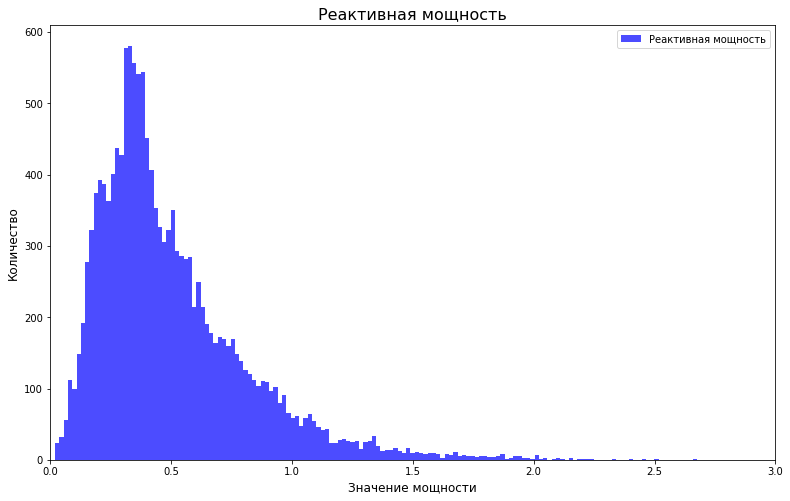

In [8]:
plt.figure(figsize=(13, 8))
plt.hist(data_arc[data_arc['Реактивная мощность'] > 0]['Реактивная мощность'], bins = 150, label = 'Реактивная мощность', color='blue',  alpha=0.7)
plt.legend()
plt.title('Реактивная мощность', fontsize=16)
plt.xlim(0, 3)
plt.xlabel('Значение мощности',fontsize=12)
plt.ylabel('Количество',fontsize=12)

<div class="alert alert-info">
<font color='black'> <b> При анализе data_arc были замечены отрицательные значения реактивной мощности. Все значения лежат до 4 и 3 (видимо кВт и кВАр) для соответственно активной и реактивной мощности. Основная масса значений для обеих мощностей находится возле значений 0.5

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>Есть осмотр) На графике тут сразу убран выброс по реактивной. Всё верно, но нужны слова в таком случае - аргументация почему потроили такой так графиу с условием. По сути - промежуточные выводы после анализа таблицы.
 <div class="alert alert-info"> <b>Комментарий студента:</b> Графики я строил после метода describe, при выполнении которого я заметил отрицательные значения реакт мощности. Этот факт я прописал в выводе в конце</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
ОК, хорошо.

In [9]:
data_bulk.info()
data_bulk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [10]:
sum_isna_duplicatated(data_bulk)

(key           0
 Bulk 1     2877
 Bulk 2     3107
 Bulk 3     1831
 Bulk 4     2115
 Bulk 5     3052
 Bulk 6     2553
 Bulk 7     3104
 Bulk 8     3128
 Bulk 9     3110
 Bulk 10    2953
 Bulk 11    2952
 Bulk 12     679
 Bulk 13    3111
 Bulk 14     323
 Bulk 15     881
 dtype: int64,
 'сумма дубликатов - 0')

In [11]:
data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


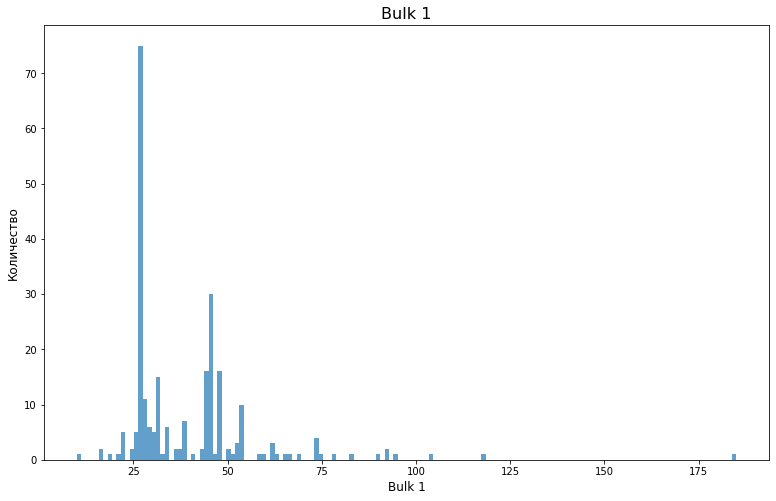

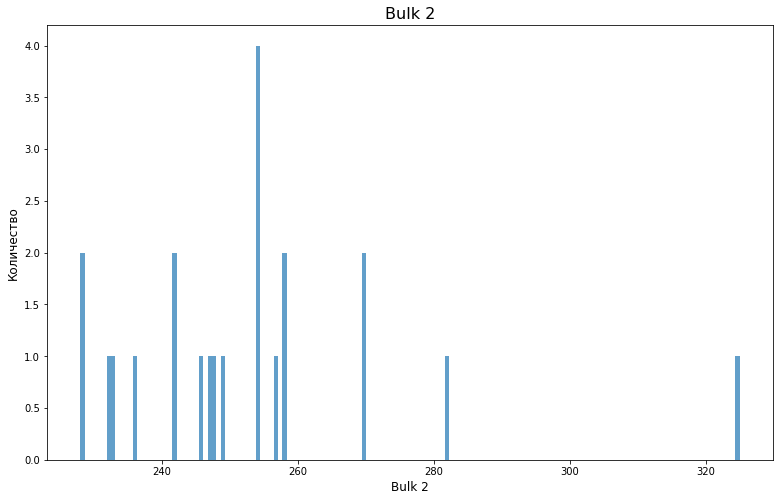

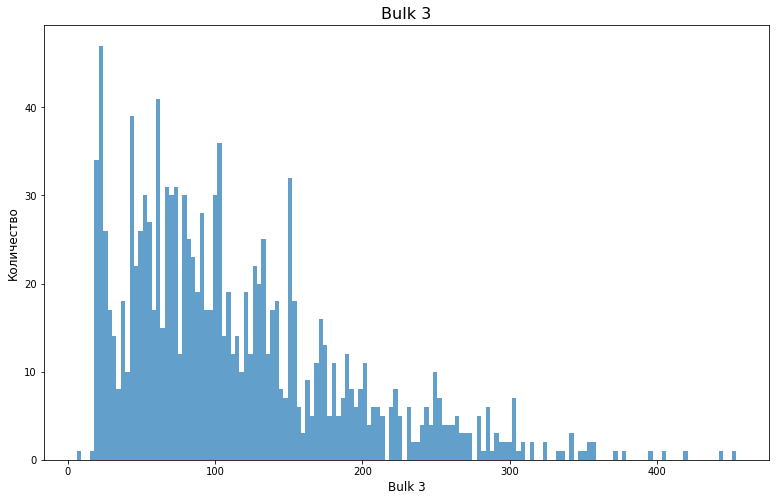

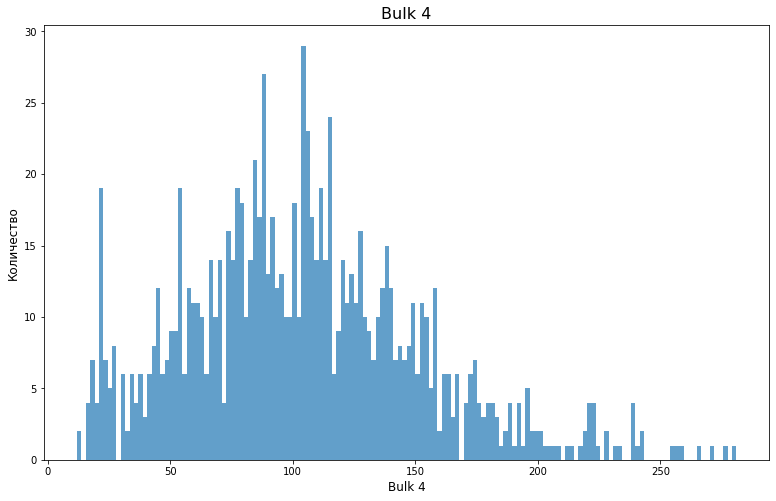

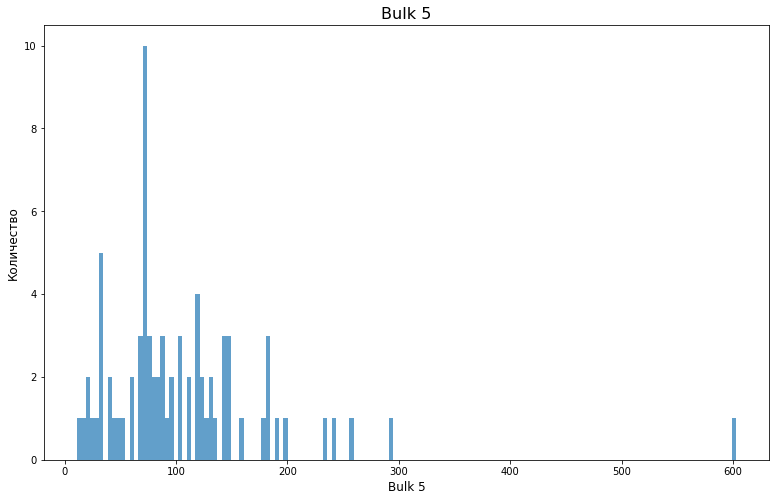

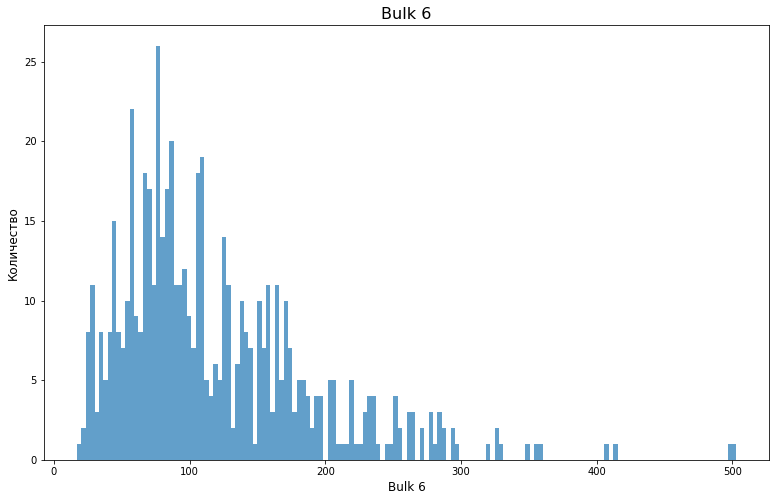

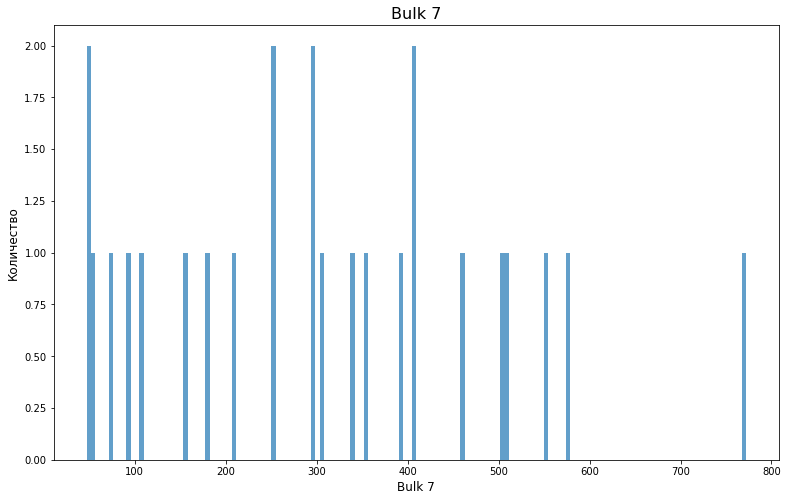

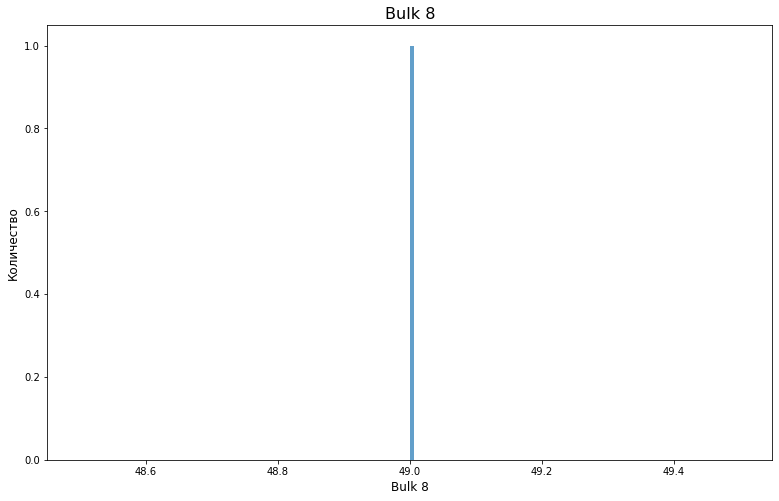

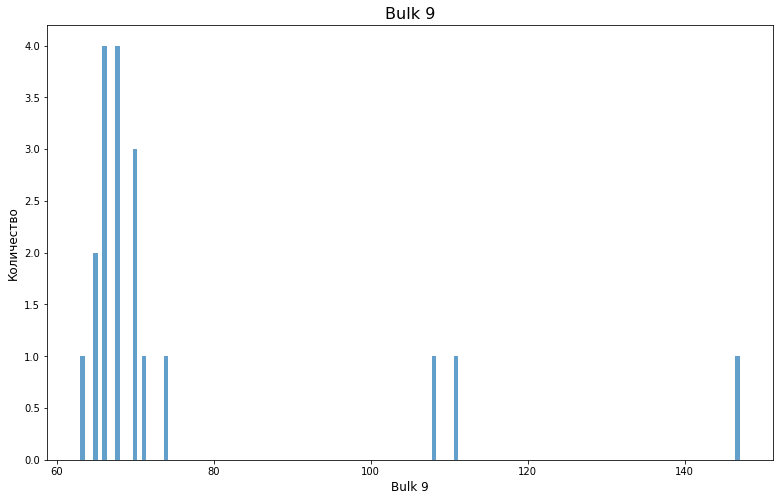

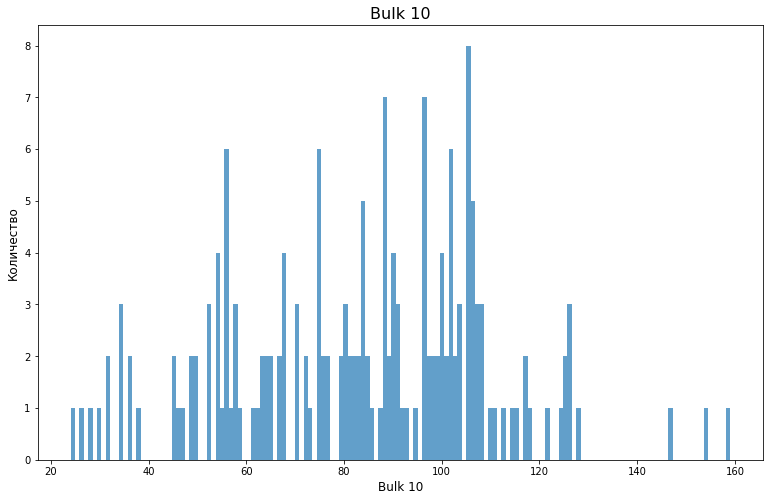

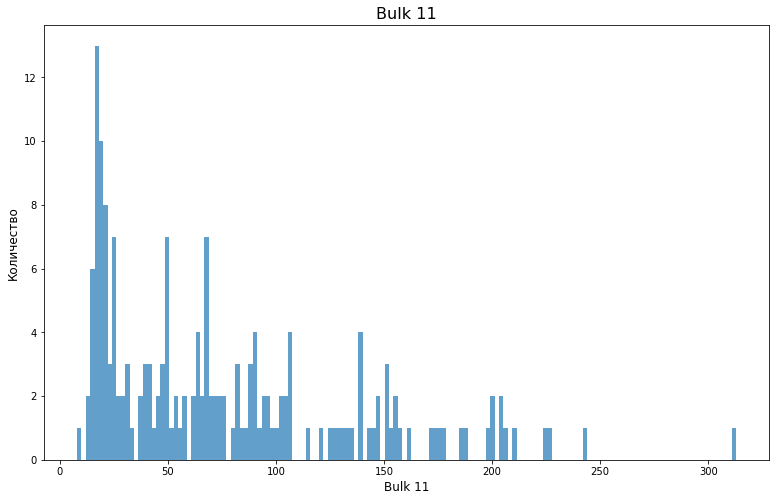

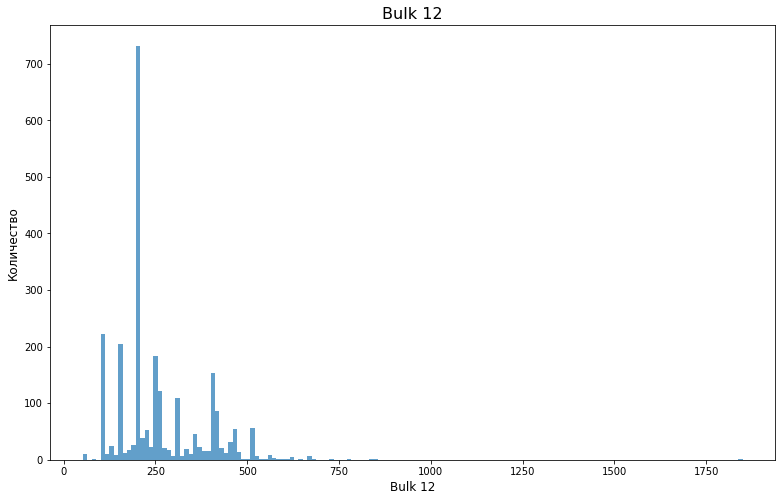

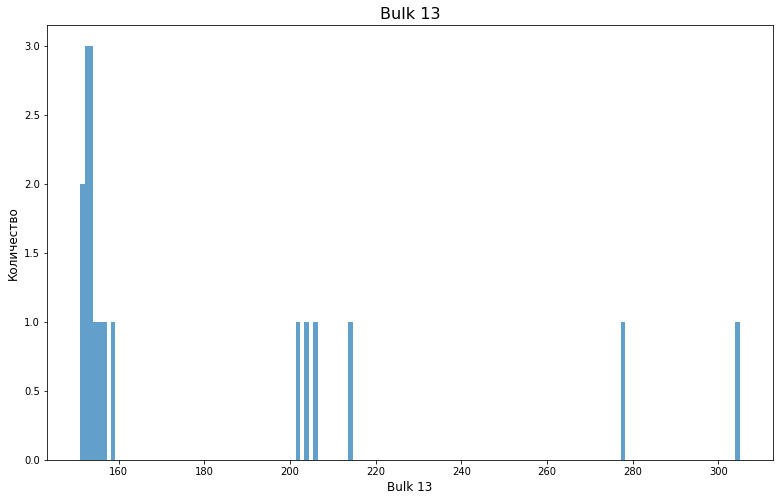

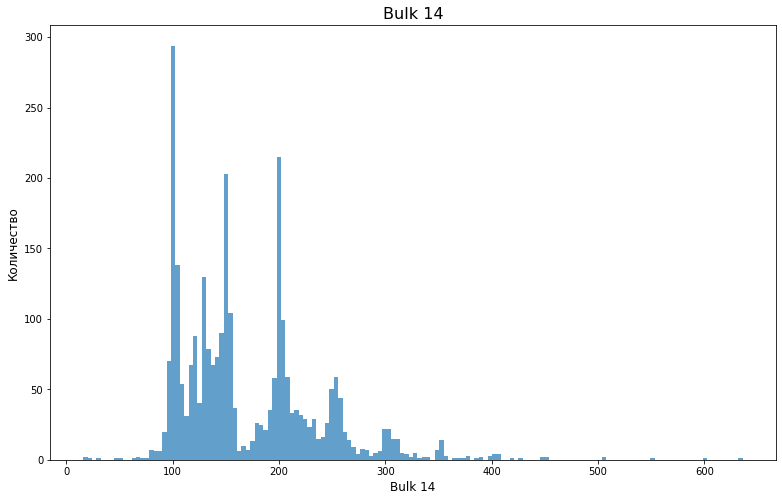

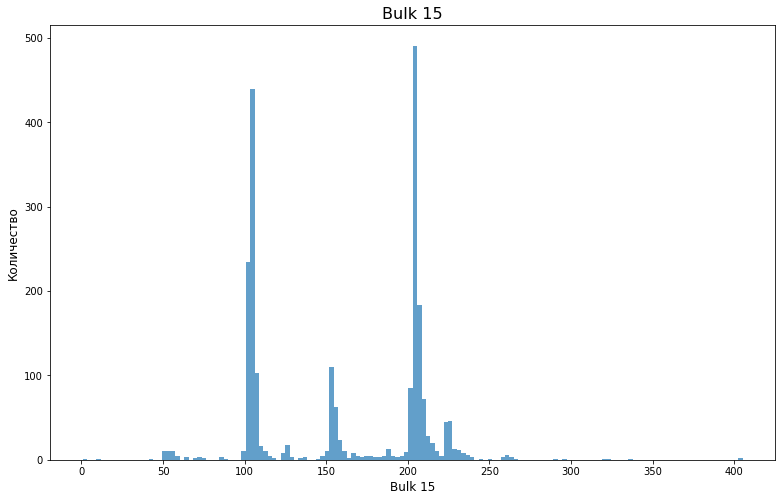

In [12]:
for column in data_bulk.columns[1:]:
    fig, ax= plt.subplots(figsize=(13, 8))
    plt.hist(data_bulk[column], bins= 150, alpha=0.7)
    plt.title(column, fontsize=16)
    plt.xlabel(column,fontsize=12)
    plt.ylabel('Количество',fontsize=12)
    

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Графический анализ - это то, что нам надо при первичном осмотре количественных данных. НО из этого графика нам сложно адекватно что-либо оценить( Лучше всё делать на раздельных графиках. СКОРРЕКТИРУЙ. пожалуйста. (по второму типу присадок - аналогично)</p>
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал. Прописал лаконично в выводе</div>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>👍

In [13]:
data_bulk_time.info()
data_bulk_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [14]:
sum_isna_duplicatated(data_bulk_time)

(key           0
 Bulk 1     2877
 Bulk 2     3107
 Bulk 3     1831
 Bulk 4     2115
 Bulk 5     3052
 Bulk 6     2553
 Bulk 7     3104
 Bulk 8     3128
 Bulk 9     3110
 Bulk 10    2953
 Bulk 11    2952
 Bulk 12     679
 Bulk 13    3111
 Bulk 14     323
 Bulk 15     881
 dtype: int64,
 'сумма дубликатов - 0')

In [15]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [16]:
data_gas.info()
data_gas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [17]:
sum_isna_duplicatated(data_gas)

(key      0
 Газ 1    0
 dtype: int64,
 'сумма дубликатов - 0')

In [18]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Text(0, 0.5, 'Количество')

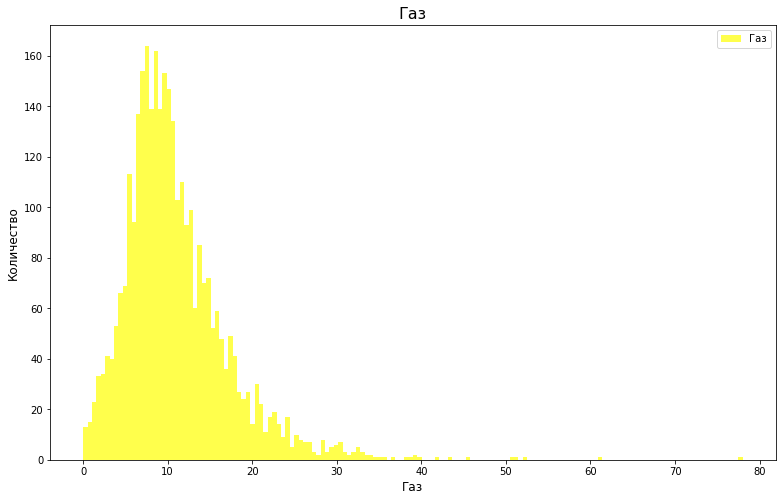

In [19]:
plt.figure(figsize=(13, 8))
plt.hist(data_gas['Газ 1'], bins = 150, label = 'Газ', color='yellow', alpha=0.7)
plt.legend()
plt.title('Газ', fontsize=16)
plt.xlabel('Газ',fontsize=12)
plt.ylabel('Количество',fontsize=12)

<div class="alert alert-info">
<font color='black'> <b> В каждую партию идет разное количество газа, но наиболее встречающееся значение - около 10

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>жёлтый газ:) ОК.</p>
</div>

In [20]:
data_temp.info()
data_temp.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [21]:
sum_isna_duplicatated(data_temp)

(key                0
 Время замера       0
 Температура     2901
 dtype: int64,
 'сумма дубликатов - 0')

In [22]:
data_temp.describe()

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Text(0, 0.5, 'Количество')

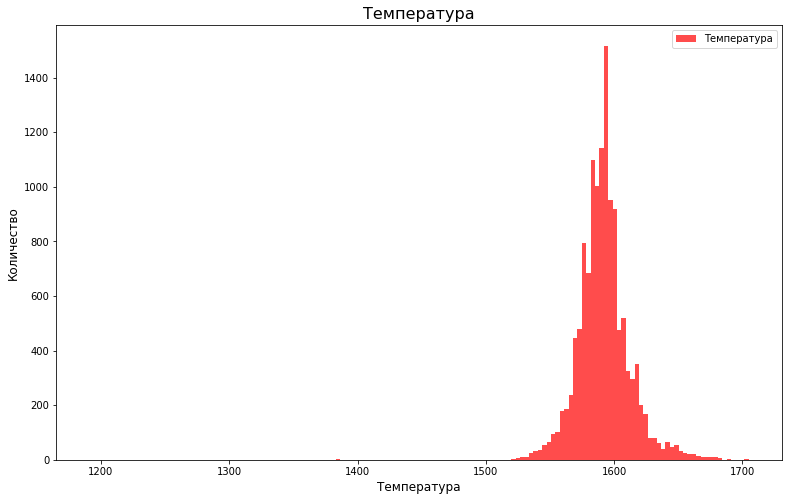

In [23]:
plt.figure(figsize=(13, 8))
plt.hist(data_temp['Температура'], bins = 150, label = 'Температура', color='red', alpha=0.7)
plt.legend()
plt.title('Температура', fontsize=16)
plt.xlabel('Температура',fontsize=12)
plt.ylabel('Количество',fontsize=12)

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Тут может возникнуть вопрос: зачем ось ОХ ограничивать на графике? Ведь таким образом мы НЕ увидим всей картины по фактору. ВОзможно, что ты уже глянул, сделал вывод, а потом ввёл ограничения... Вот эти выводы и нужны здесь тогда) Но лучше выводить изначальное распределение данных. Чтобы видеть реальность данных. СКОРРЕКТИРУЙ, пожалуйста. </p>
<div class="alert alert-info"> <b>Комментарий студента:</b> Да, я сделал ограничение,т.к. весь график был справа, хотел отцентровать)
</div>

<div class="alert alert-info">
<font color='black'> <b> Значения температуры варьируются в диапазоне от 1500 до 1700. Основная масса значений лежит около значения 1600. Похоже, что по мере добавления присадок, температура увеличивается, потом немного падает

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ок. А вот супервыбросов не видно тут((( Поэтому и есть такая рекомендация: вместе ипользовать гистограмму и ящик с усами (боксплот). Гистограмма хорошо показывает однорость/неоднородность данных. А ящик - хорошо видит выбросы Например так могут выводиться:

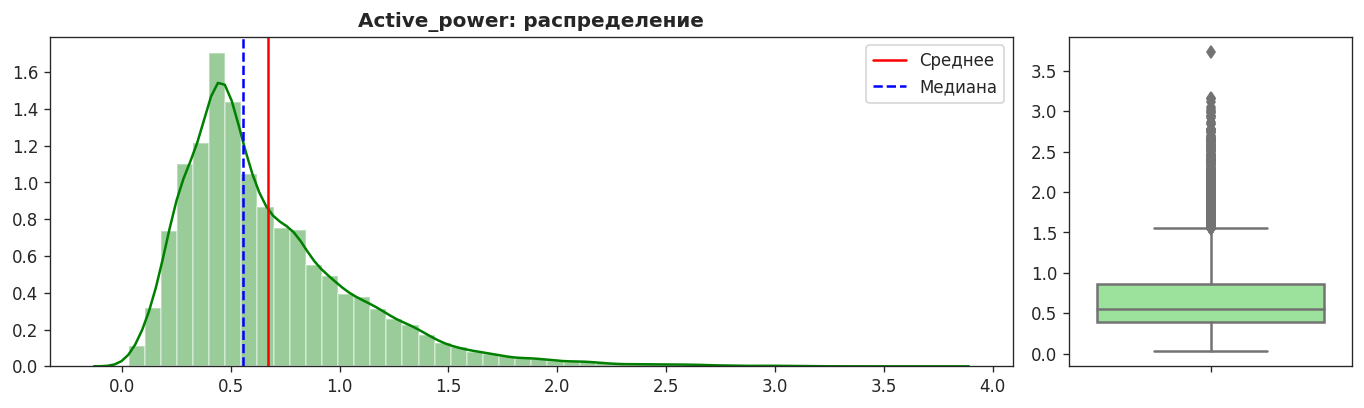

In [24]:
data_wire.info()
data_wire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
sum_isna_duplicatated(data_wire)

(key          0
 Wire 1      26
 Wire 2    2002
 Wire 3    3018
 Wire 4    3067
 Wire 5    3080
 Wire 6    3008
 Wire 7    3070
 Wire 8    3062
 Wire 9    3052
 dtype: int64,
 'сумма дубликатов - 0')

In [26]:
data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


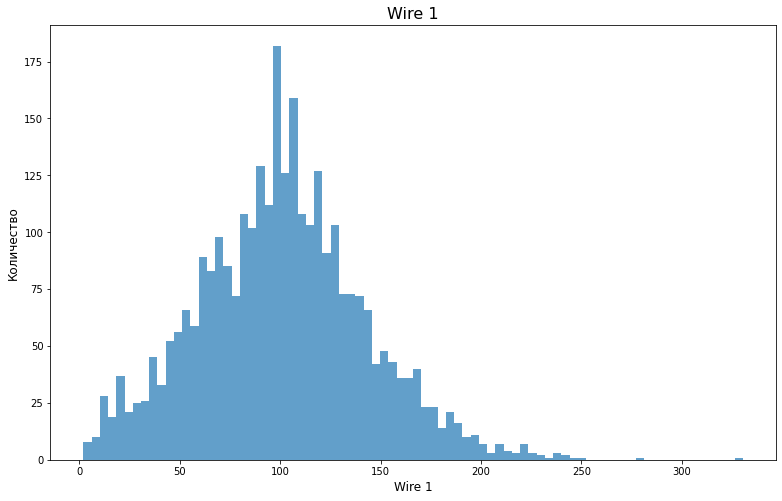

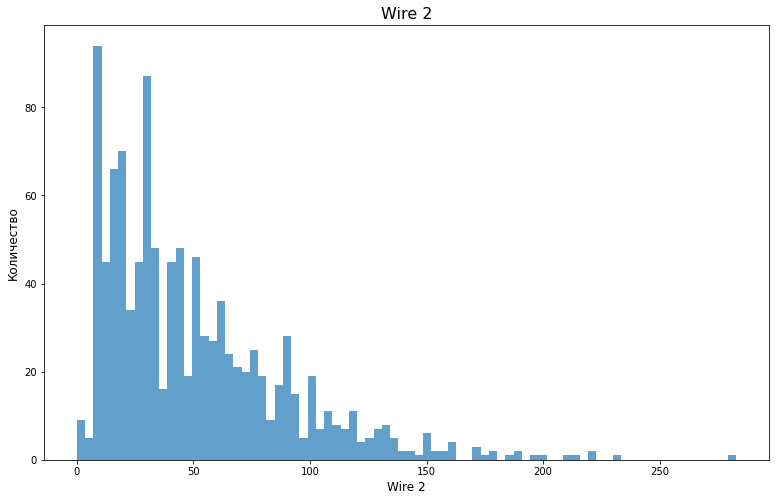

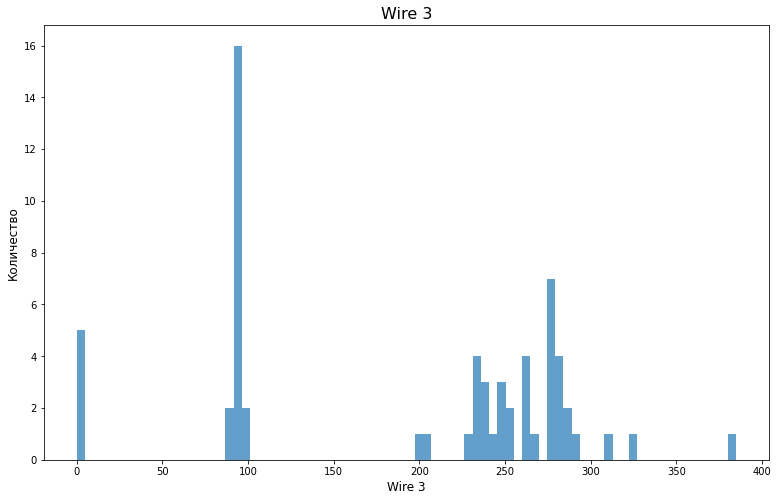

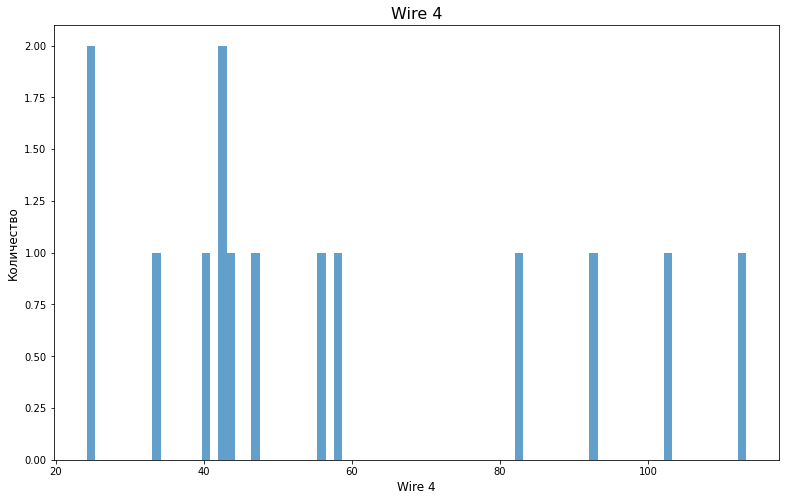

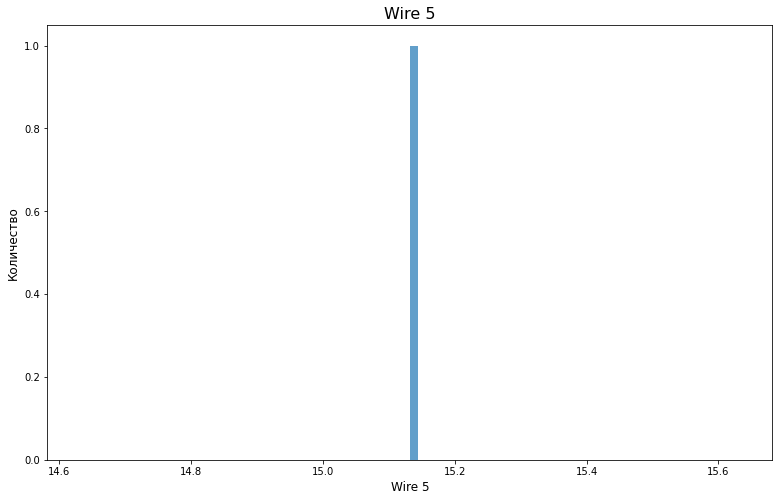

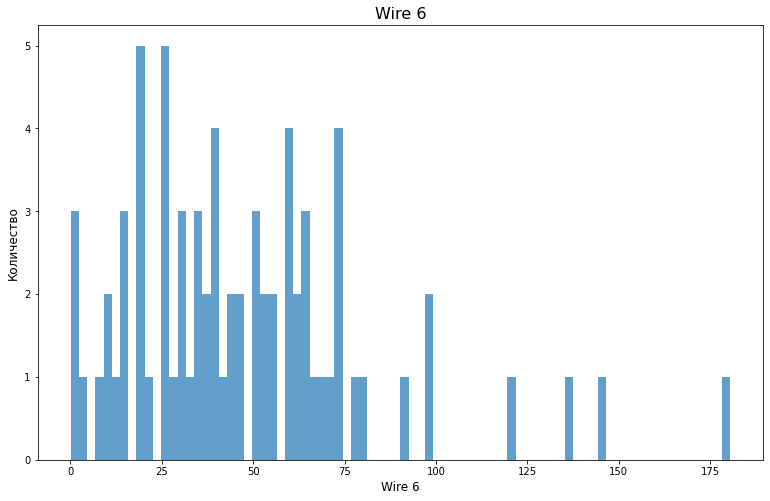

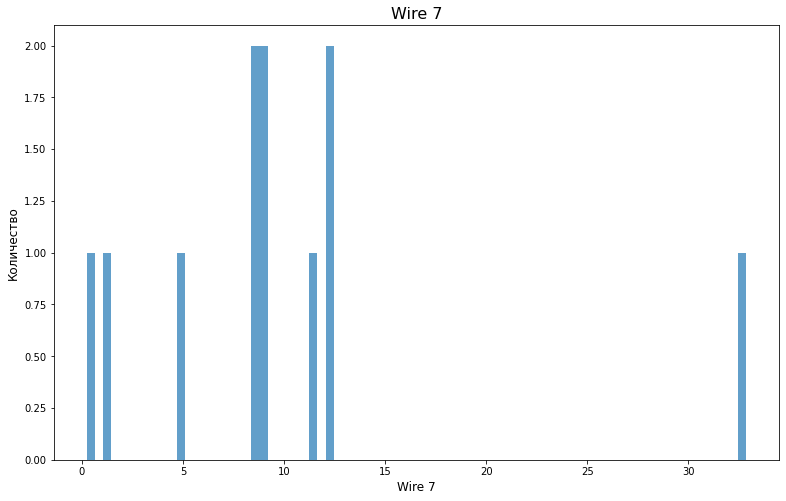

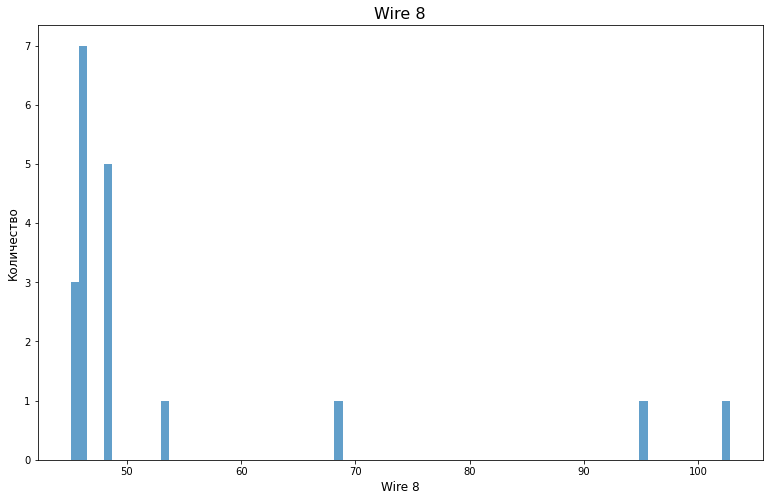

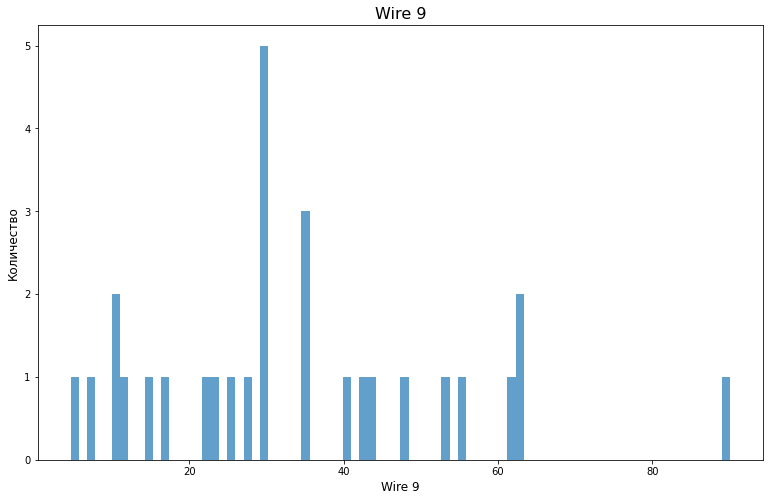

In [27]:
for column in data_wire.columns[1:]:
    fig, ax= plt.subplots(figsize=(13, 8))
    plt.hist(data_wire[column], bins= 80, alpha=0.7)
    plt.title(column, fontsize=16)
    plt.xlabel(column,fontsize=12)
    plt.ylabel('Количество',fontsize=12)



<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>тут аналогично предыдущей присадки)</p>
    <div class="alert alert-info"> <b>Комментарий студента:</b> Сделал</div>
</div>
 


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК)

In [28]:
data_wire_time.info()
data_wire_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
sum_isna_duplicatated(data_wire_time)

(key          0
 Wire 1      26
 Wire 2    2002
 Wire 3    3018
 Wire 4    3067
 Wire 5    3080
 Wire 6    3008
 Wire 7    3070
 Wire 8    3062
 Wire 9    3052
 dtype: int64,
 'сумма дубликатов - 0')

In [30]:
data_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


<div class="alert alert-info">
<font color='black'> <b>
Вывод по анализу данных:<br> 1)Имеются пропуски значений в столбцах, дубликаты не обнаружены<br>
2) Разноязычные названия столбцов + имеются пробелы<br>
3) Необходимо перевести времени в формат datetime из формата object. <br>
4) Аномальное значение реактивной мощности в таблице data_arc. <br>
5) Таблицы data_arc и data_temp обладают записями с одинаковыми значениями key в разное время применения технологической операции. <br>
6) В таблицах data_bulk (bulk_8) и data_wire (wire_5) фактически нет значений (одни пропуски). Из графиков видно, каким-то партиям нужен определенный набор присадок, далеко не все партии используют полный набор<br>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Про нормальность - сложно сразу сказать из данных графиков) - они ведь усечены, а другие в одной куче-мале)) представлены. А в целом такой алгоритм по исследованию о нормальности: на графике делаем предположения. А аналитическим методом  (тест на нормальность) проверяем. Поэтому тут вывод о нормальности - на поспорить, пока))</p>
    <div class="alert alert-info"> <b>Комментарий студента:</b> </b> К примеру по температуре: среднее значение - 1591. Стандартное отклонение - 21.3. 99% значений должны лежать в промежутке 1591 +/- 63.9 (3 сигмы). По графику видно, что распределение довольно близко к этим параметрам нормального распределения.</div>


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
Ок, но есть ещё тесты. Вот здесь кратко показаны два из них:<br>
    
www.statology.org/normality-test-python/

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Александр, с первичным анализом - увидел: есть аналитика по данным, есть выводы, есть графики. С этим ОК. НО...<br>
1) Есть комментари по графикам - посмотри, пожалуйста.<br>
2) Есть комментарий по нормальности.<br>
3) Наша очновная табличка - temp. А вот по ней ничего не сказано - что, отчего, какие идеи...((<br>
<br>
По плану выше - написал.<br>
    
Скорректируй, пожалуйста. <br>
И ещё - по вопросам - их нет?<br>
БУДУ ЖДАТЬ!
 <div class="alert alert-info"> <b>Комментарий студента:</b> Как быть с мощностью? просуммировать по каждой партии? найти среднее? Голова уже не работает, а делать еще очень много(( </div>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
Самое простое сейчас усреднить) <br>
    
ОК, Александр, увидел твои корректировки/коммекнтарии. <br>
Что ж, впереди, тогда, только моделирование)<br>
УСПЕХОВ! Если возникнут вопросы - в слаке сможем пересечься.

## Предобработка

In [31]:
data_arc.columns = ['key', 'time_of_start','time_of_end', 'active_power', 'reactive_power']
data_arc = data_arc.query('reactive_power > 0')
data_arc_mean = pd.pivot_table(data_arc,
                             values=['active_power','reactive_power'],
                             index='key',
                             aggfunc='mean')

In [32]:
data_arc_mean

,active_power,reactive_power
key,,
1,0.975629,0.636648
2,0.763150,0.499528
3,0.505176,0.319815
4,0.802313,0.515074
5,0.836793,0.563161
...,...,...
3237,0.786493,0.565692
3238,0.702176,0.560394
3239,0.583344,0.388952


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Понятно.

In [33]:
data_gas=data_gas.rename(columns={'Газ 1':'gas'})

In [34]:
data_temp=data_temp.rename(columns={'Время замера':'date_of_measure_temp', 'Температура':'temperature'})

In [35]:
data_temp

,key,date_of_measure_temp,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


In [36]:
data_temp_pivot = pd.pivot_table(data_temp,
                                values='date_of_measure_temp',
                                index='key',
                                aggfunc={'min', 'max'})
data_temp_pivot.columns=['temp_max', 'temp_min']

In [37]:
data_temp_pivot

,temp_max,temp_min
key,,
1,2019-05-03 11:30:39,2019-05-03 11:16:18
2,2019-05-03 11:59:12,2019-05-03 11:37:27
3,2019-05-03 12:34:57,2019-05-03 12:13:17
4,2019-05-03 12:59:25,2019-05-03 12:52:57
5,2019-05-03 13:36:01,2019-05-03 13:23:19
...,...,...
3237,2019-08-31 23:05:43,2019-08-31 22:44:04
3238,2019-08-31 23:43:00,2019-08-31 23:30:31
3239,2019-09-01 02:24:15,2019-09-01 01:31:47


In [38]:
minim=data_temp_pivot['temp_min']
maxim=data_temp_pivot['temp_max']
data_temp_start_temp = data_temp.query('date_of_measure_temp in @minim')
data_temp_start_temp = data_temp_start_temp.set_index('key')
data_temp_end_temp = data_temp.query('date_of_measure_temp in @maxim')
data_temp_end_temp = data_temp_end_temp.set_index('key')
data_temp_full=data_temp_start_temp
data_temp_full.columns=['date_of_measure_temp', 'start_temp']
data_temp_full['end_temp']=data_temp_end_temp['temperature']
data_temp_full=data_temp_full.drop('date_of_measure_temp', axis=1)

In [39]:
data_temp_full

,start_temp,end_temp
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
3237,1569.0,NaN
3238,1584.0,NaN
3239,1598.0,NaN


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>тааааак, согласен.

In [40]:
data_bulk = data_bulk.set_index('key')
data_gas = data_gas.set_index('key')
data_wire = data_wire.set_index('key')

In [41]:
data_bulk = data_bulk.fillna(0)
data_wire = data_wire.fillna(0)


In [42]:
data_all_1=data_arc_mean.merge(data_temp_full, on='key')
data_all_2=data_all_1.merge(data_bulk, on='key')
data_all_3=data_all_2.merge(data_gas, on='key')
data_all=data_all_3.merge(data_wire, on='key')

In [43]:
data_all

,active_power,reactive_power,start_temp,end_temp,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
1,0.975629,0.636648,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,0.0,...,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.763150,0.499528,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,0.0,...,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.505176,0.319815,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,0.0,...,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.802313,0.515074,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,0.0,...,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.836793,0.563161,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,0.0,...,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,0.786493,0.565692,1569.0,NaN,0.0,0.0,170.0,0.0,0.0,0.0,...,5.543905,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3238,0.702176,0.560394,1584.0,NaN,0.0,0.0,126.0,0.0,0.0,0.0,...,6.745669,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3239,0.583344,0.388952,1598.0,NaN,0.0,0.0,0.0,0.0,0.0,114.0,...,16.023518,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
При объединении таблиц могут появиться строки, где не будет ни одной присадки или не будет газа. Такие строки нужно удалять. Т.к. присадка должна быть по любому. И газ - должен быть по любому. Возможно, что inner справится с этой проблематикой. Посомтри, пожалуйста. Нам нужны только те партии, которые есть во всех таблицах!<br>
тут лучше сначала заполнить пропуски 0 в таблицах с присадками. Потом соединить по иннер. И всё должно сработать.
<div class="alert alert-info"> <b>Комментарий студента:</b> </b> Сделал</div>

In [44]:
data_all.describe()

,active_power,reactive_power,start_temp,end_temp,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3022.000000,3022.000000,3022.000000,2329.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,...,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,0.664574,0.497500,1586.772005,1593.365393,3.272336,1.842158,48.719060,34.930510,2.727002,22.449371,...,11.302433,100.306762,17.555999,3.950168,0.266115,0.005007,1.159907,0.036542,0.337154,0.246959
std,0.198849,0.149442,28.104700,11.200915,12.062357,21.587675,74.954261,56.570091,21.279385,56.149242,...,6.233396,42.746214,33.306307,30.600083,4.335435,0.275264,9.043740,0.781697,4.435119,3.040308
min,0.186226,0.130062,1191.000000,1541.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.519280,0.386716,1571.000000,1587.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.281707,71.436301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.641002,0.486450,1587.000000,1593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.016304,100.151993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.788538,0.592339,1603.000000,1598.000000,0.000000,0.000000,82.000000,72.000000,0.000000,0.000000,...,14.077546,125.863920,23.159760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.421416,1.134983,1660.000000,1653.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,...,77.995040,330.314424,282.780152,385.008668,113.231044,15.132000,180.454575,32.847674,102.762401,62.025600


In [45]:
data_all=data_all.drop('Wire 5', axis=1)
data_all=data_all.drop('Bulk 8', axis=1)

In [46]:
data_all=data_all.rename(columns={'Bulk 1':'bulk_1','Bulk 2':'bulk_2', 'Bulk 3':'bulk_3',
                                 'Bulk 4':'bulk_4', 'Bulk 5':'bulk_5', 'Bulk 6':'bulk_6',
                                 'Bulk 7':'bulk_7', 'Bulk 9':'bulk_9',
                                 'Bulk 10':'bulk_10', 'Bulk 11':'bulk_11', 'Bulk 12':'bulk_12',
                                 'Bulk 13':'bulk_13', 'Bulk 14':'bulk_14', 'Bulk 15':'bulk_15',
                                 'Wire 1':'wire_1','Wire 2':'wire_2', 'Wire 3':'wire_3',
                                 'Wire 4':'wire_4', 'Wire 6':'wire_6',
                                 'Wire 7':'wire_7','Wire 8':'wire_8', 'Wire 9':'wire_9'})

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>тут понятно.

In [47]:
data_all=data_all.dropna(subset=['end_temp'])

In [48]:
data_all

,active_power,reactive_power,start_temp,end_temp,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_15,gas,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,,,,,,,,,,,,,
1,0.975629,0.636648,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,0.0,...,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.763150,0.499528,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,0.0,...,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.505176,0.319815,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,0.0,...,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.802313,0.515074,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,0.0,...,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.836793,0.563161,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,0.0,...,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.802673,0.590194,1570.0,1591.0,0.0,0.0,21.0,0.0,0.0,0.0,...,223.0,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.700511,0.468364,1554.0,1591.0,0.0,0.0,0.0,63.0,0.0,0.0,...,226.0,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.737460,0.617090,1571.0,1589.0,0.0,0.0,0.0,85.0,0.0,0.0,...,226.0,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data_all = data_all.fillna(0)

In [50]:
data_all

,active_power,reactive_power,start_temp,end_temp,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_15,gas,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,,,,,,,,,,,,,
1,0.975629,0.636648,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,0.0,...,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.763150,0.499528,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,0.0,...,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.505176,0.319815,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,0.0,...,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.802313,0.515074,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,0.0,...,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.836793,0.563161,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,0.0,...,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.802673,0.590194,1570.0,1591.0,0.0,0.0,21.0,0.0,0.0,0.0,...,223.0,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.700511,0.468364,1554.0,1591.0,0.0,0.0,0.0,63.0,0.0,0.0,...,226.0,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.737460,0.617090,1571.0,1589.0,0.0,0.0,0.0,85.0,0.0,0.0,...,226.0,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
ОК, есть контакт.

In [51]:
data_all['active_power']=round(data_all['active_power'], 2)
data_all['reactive_power']=round(data_all['reactive_power'], 2)
data_all['gas']=data_all['gas'].astype('int')
data_all[['start_temp','end_temp']]=data_all[['start_temp','end_temp']].astype('int')

In [52]:
for i in range(1,8):
    data_all[f'bulk_{i}'] = data_all[f'bulk_{i}'].astype('int')
for i in range(9,16):
    data_all[f'bulk_{i}'] = data_all[f'bulk_{i}'].astype('int') 
for i in range(1,5):
    data_all[f'wire_{i}'] = data_all[f'wire_{i}'].astype('int')
for i in range(6,10):
    data_all[f'wire_{i}'] = data_all[f'wire_{i}'].astype('int')    

In [53]:
data_all.head(15)

,active_power,reactive_power,start_temp,end_temp,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_15,gas,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,,,,,,,,,,,,,
1,0.98,0.64,1571,1613,0,0,0,43,0,0,...,154,29,60,0,0,0,0,0,0,0
2,0.76,0.50,1581,1602,0,0,0,73,0,0,...,154,12,96,0,0,0,0,0,0,0
3,0.51,0.32,1596,1599,0,0,0,34,0,0,...,153,28,91,0,0,0,0,0,0,0
4,0.80,0.52,1601,1625,0,0,0,81,0,0,...,154,18,89,0,0,0,0,0,0,0
5,0.84,0.56,1576,1602,0,0,0,78,0,0,...,152,5,89,9,0,0,0,0,0,0
6,0.99,0.67,1543,1596,0,0,0,117,0,0,...,154,11,99,9,0,0,0,0,0,0
7,0.64,0.39,1586,1599,0,0,0,117,0,0,...,154,9,98,0,0,0,0,0,0,0
8,0.94,0.67,1577,1598,0,0,0,99,0,0,...,153,15,155,0,0,0,0,0,0,0
9,0.42,0.30,1587,1592,0,0,0,117,0,0,...,203,8,113,9,0,0,0,0,0,0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>понятно.

In [54]:
data_all.corr()

,active_power,reactive_power,start_temp,end_temp,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_15,gas,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
active_power,1.000000,0.922670,-0.404493,0.210869,0.030881,-0.039220,0.057019,-0.041019,-0.048548,0.045258,...,0.340972,0.097750,-0.096279,-0.007032,0.005083,-0.040082,0.037271,-0.031392,-0.007412,0.003056
reactive_power,0.922670,1.000000,-0.378598,0.150230,0.061516,-0.024883,-0.001742,-0.044509,-0.037581,0.034057,...,0.301059,0.073322,-0.137540,-0.014893,-0.005244,-0.023888,0.029290,-0.016770,-0.022938,0.003334
start_temp,-0.404493,-0.378598,1.000000,0.252443,0.072331,0.119802,-0.104394,0.144775,0.068389,-0.096951,...,-0.040349,0.036533,0.209514,-0.086063,-0.000232,0.064917,0.019856,0.043492,-0.023319,0.004177
end_temp,0.210869,0.150230,0.252443,1.000000,-0.075206,-0.082454,-0.035977,0.187970,-0.028355,-0.181816,...,0.266414,0.059748,0.317572,-0.206579,-0.047483,-0.159664,-0.083973,-0.136032,-0.010752,-0.027616
bulk_1,0.030881,0.061516,0.072331,-0.075206,1.000000,0.224701,-0.011628,0.041846,0.060429,-0.003630,...,-0.000800,0.232052,0.013618,-0.009163,0.020175,0.146142,0.148329,0.082766,-0.019542,0.011248
bulk_2,-0.039220,-0.024883,0.119802,-0.082454,0.224701,1.000000,-0.046888,0.040792,0.360302,-0.029984,...,-0.105693,0.216625,-0.169361,-0.039007,0.222801,0.698969,0.558109,0.426449,-0.005275,-0.006832
bulk_3,0.057019,-0.001742,-0.104394,-0.035977,-0.011628,-0.046888,1.000000,-0.295431,-0.006801,0.065284,...,-0.012860,0.059492,0.039620,0.095825,0.005831,-0.040515,0.007133,-0.019238,0.004856,0.004647
bulk_4,-0.041019,-0.044509,0.144775,0.187970,0.041846,0.040792,-0.295431,1.000000,0.028348,-0.251562,...,0.101514,0.018589,0.297683,-0.268085,-0.039214,0.034393,-0.011419,0.033348,0.007778,-0.058089
bulk_5,-0.048548,-0.037581,0.068389,-0.028355,0.060429,0.360302,-0.006801,0.028348,1.000000,-0.021852,...,-0.067190,0.087436,-0.013381,-0.013748,0.070801,0.262673,0.204603,0.169768,-0.008340,-0.010802
bulk_6,0.045258,0.034057,-0.096951,-0.181816,-0.003630,-0.029984,0.065284,-0.251562,-0.021852,1.000000,...,-0.109316,0.139882,-0.236061,0.204461,-0.046546,-0.025909,-0.020210,-0.012302,-0.028450,-0.013187


<div class="alert alert-info">
<font color='black'> <b>
При оценке корреляции видно, что зависимость целевого признака от нецелевых признаков слабая

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
    <p>Когда таблица большая - многие моменты не увидеть. И тут график нам в помощь. Например как ниже. Видно, что есть нулевые факторы - их удаляем. Есть мультиколлинеарность в данных (когда между факторами корреляция более 0.9). И тогда от одного из факторов пары лучше избавиться.</p>
<div class="alert alert-info"> <b>Комментарий студента:</b> </b> Сделал</div>

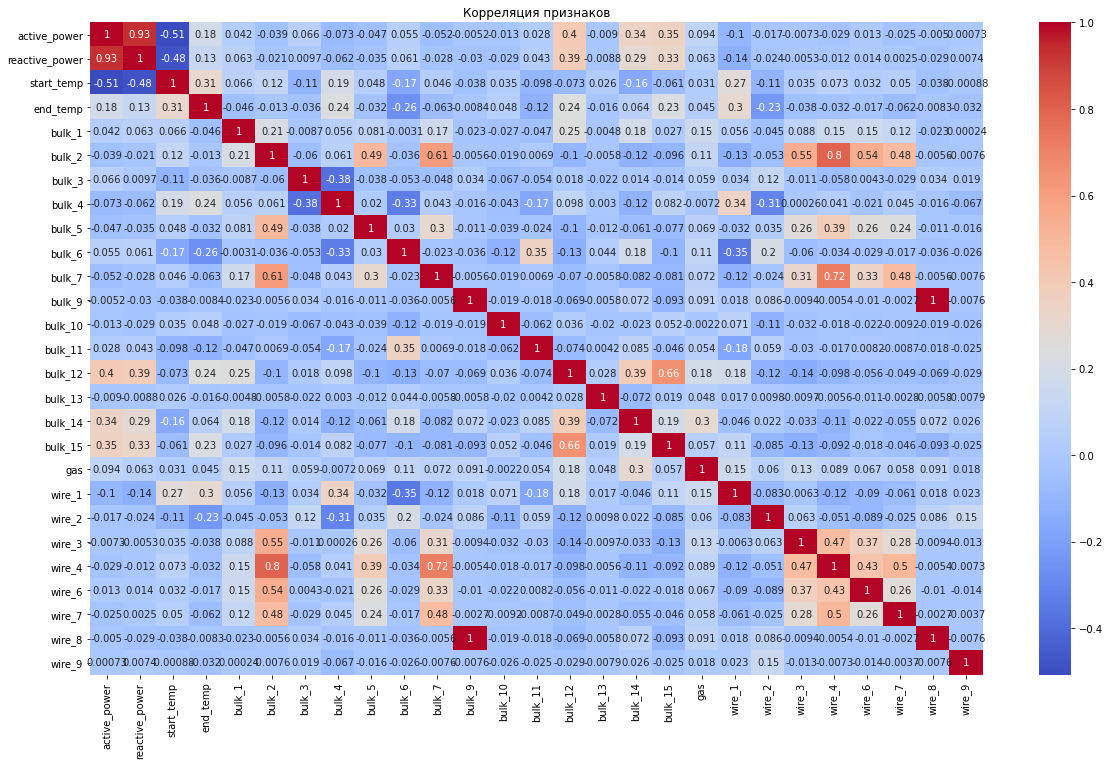

In [55]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(data_all.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

<div class="alert alert-info">
<font color='black'> <b>
Удалим столбец 'reactive_power' как дублирующий для 'active_power' и 'wire_8' как дублирующий для 'bulk_9'. 'bulk_9' тоже удалим,т.к. корреляции с целевым признаком не наблюдается

In [56]:
data_all=data_all.drop('reactive_power', axis=1)
data_all=data_all.drop('wire_8', axis=1)
data_all=data_all.drop('bulk_9', axis=1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
ОК

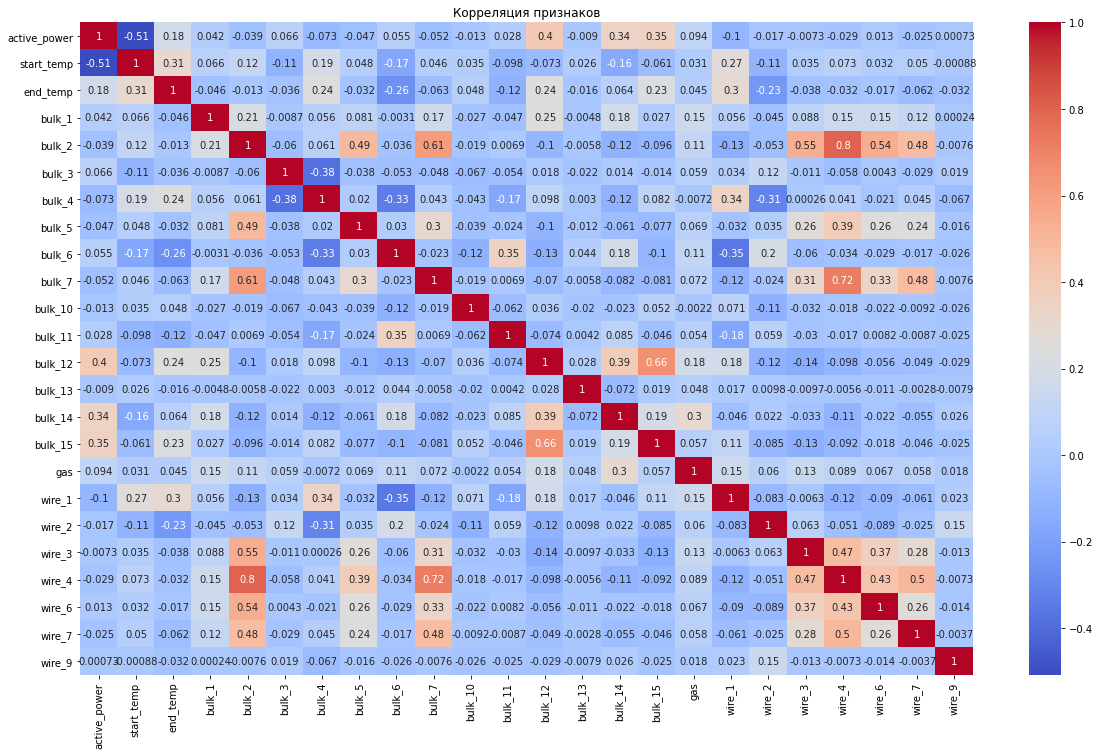

In [57]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(data_all.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

In [58]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 1 to 2499
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   active_power  2329 non-null   float64
 1   start_temp    2329 non-null   int64  
 2   end_temp      2329 non-null   int64  
 3   bulk_1        2329 non-null   int64  
 4   bulk_2        2329 non-null   int64  
 5   bulk_3        2329 non-null   int64  
 6   bulk_4        2329 non-null   int64  
 7   bulk_5        2329 non-null   int64  
 8   bulk_6        2329 non-null   int64  
 9   bulk_7        2329 non-null   int64  
 10  bulk_10       2329 non-null   int64  
 11  bulk_11       2329 non-null   int64  
 12  bulk_12       2329 non-null   int64  
 13  bulk_13       2329 non-null   int64  
 14  bulk_14       2329 non-null   int64  
 15  bulk_15       2329 non-null   int64  
 16  gas           2329 non-null   int64  
 17  wire_1        2329 non-null   int64  
 18  wire_2        2329 non-null 

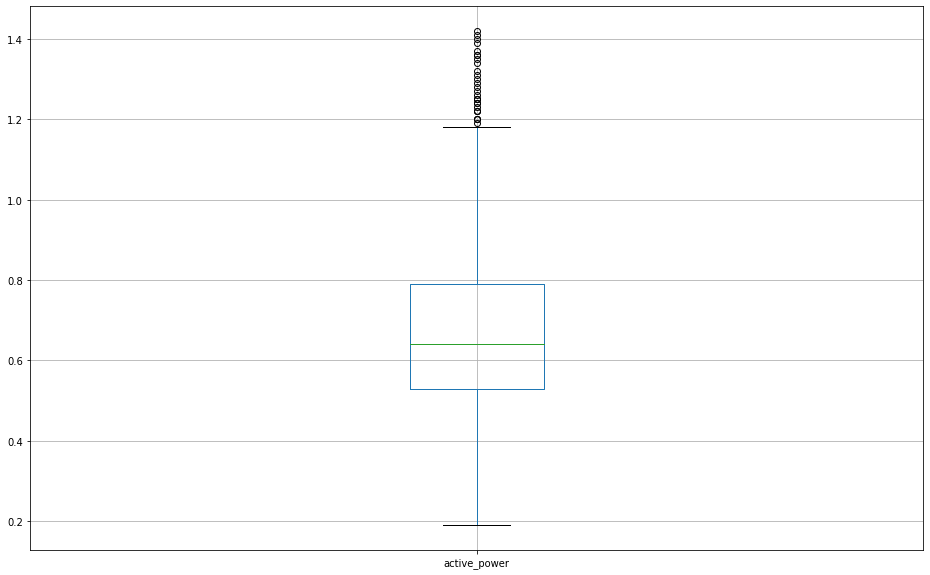

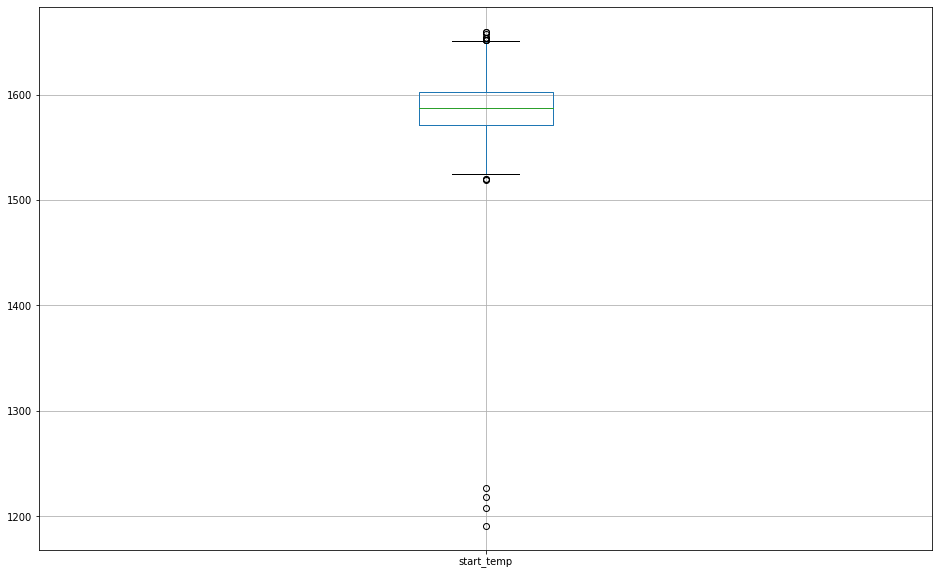

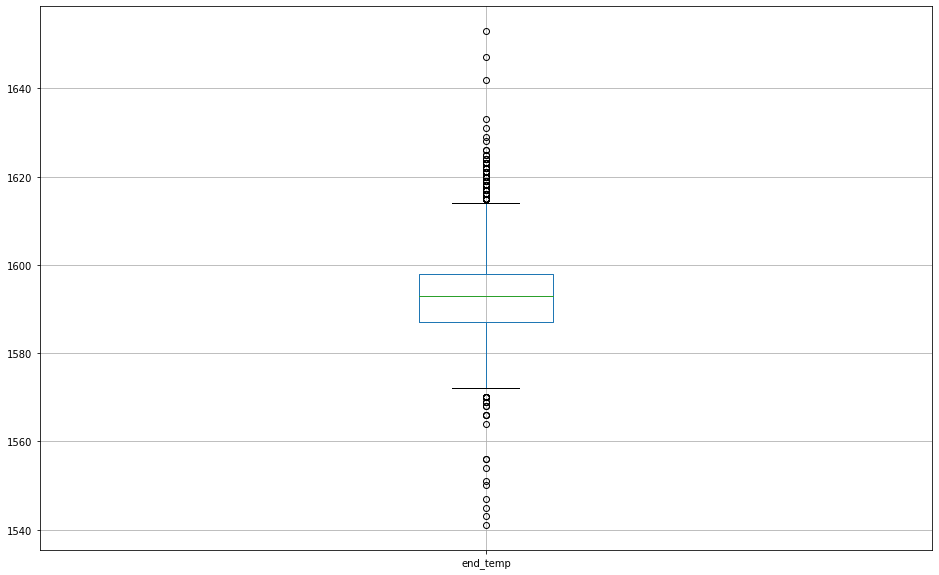

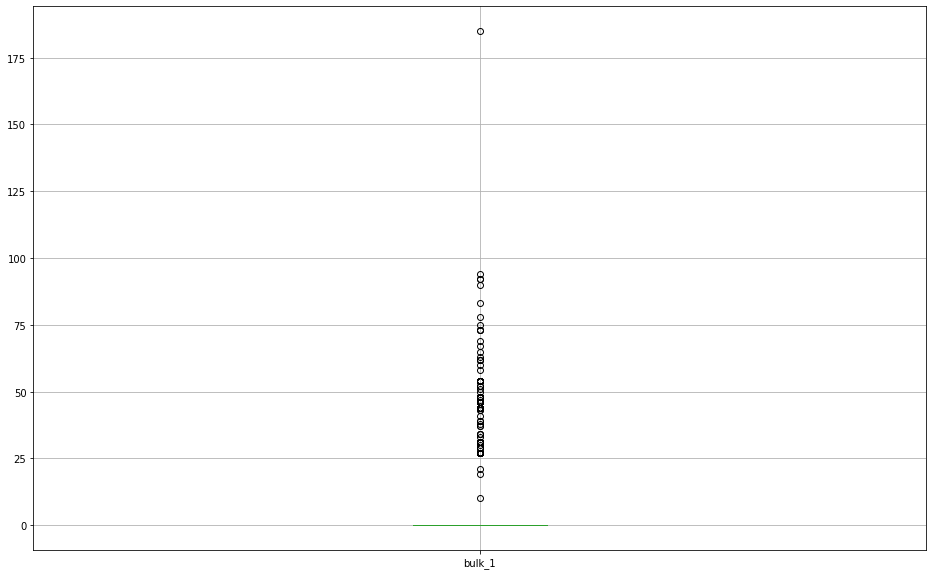

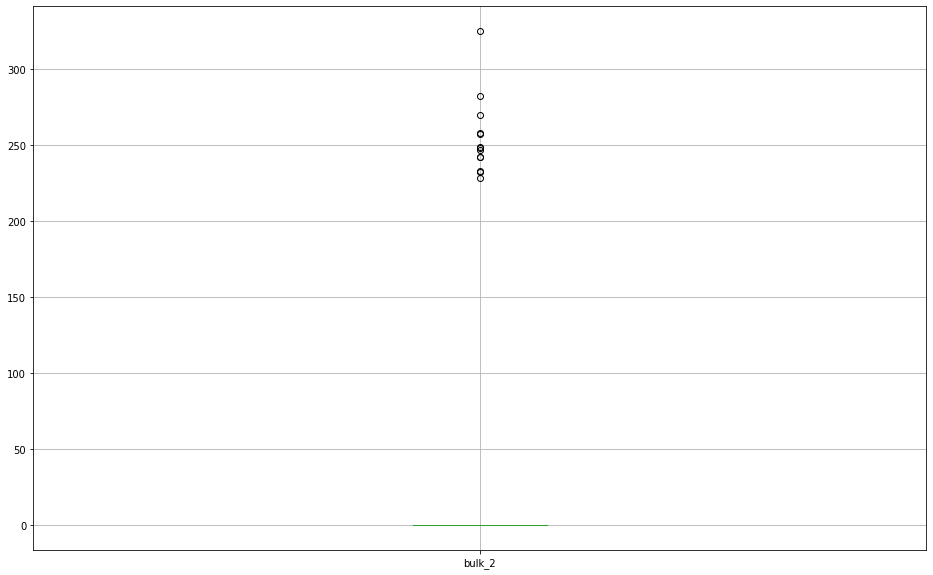

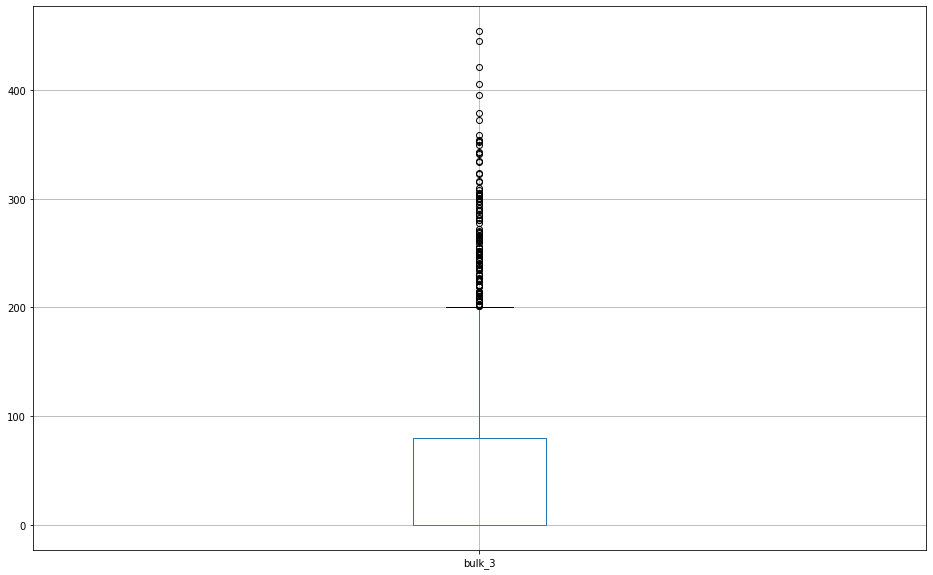

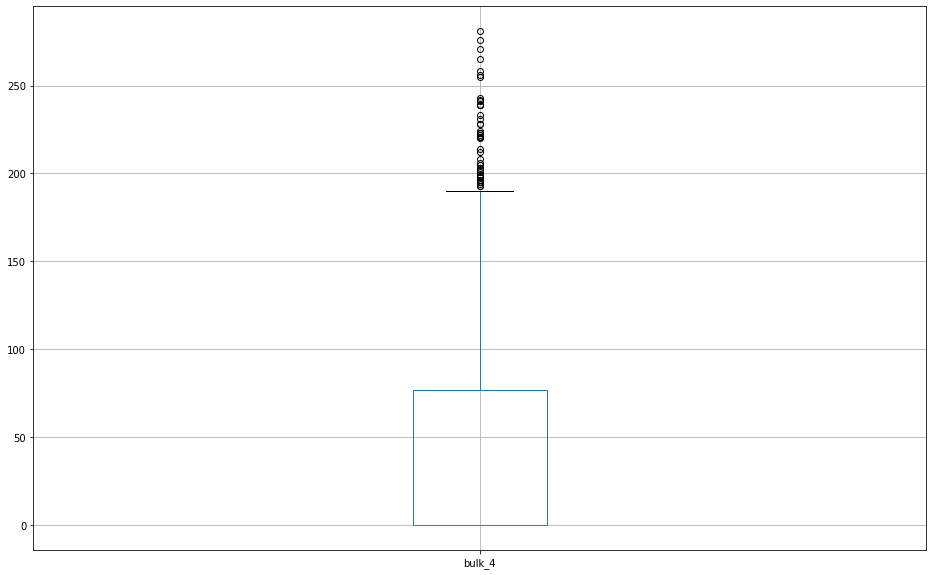

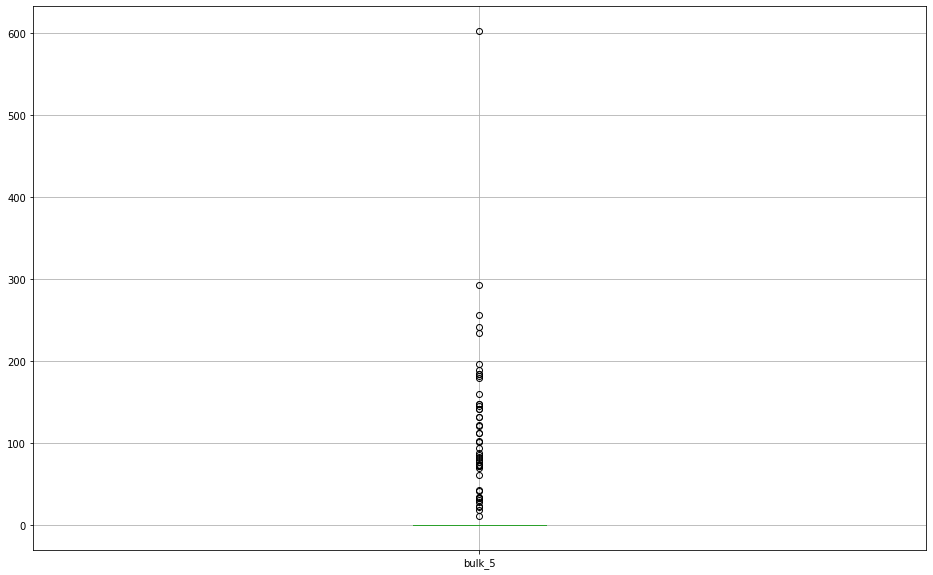

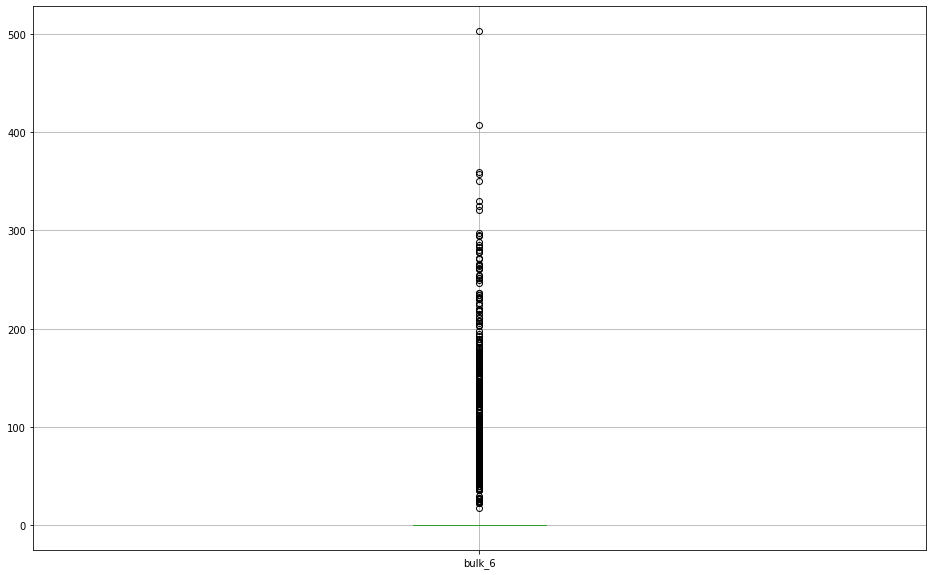

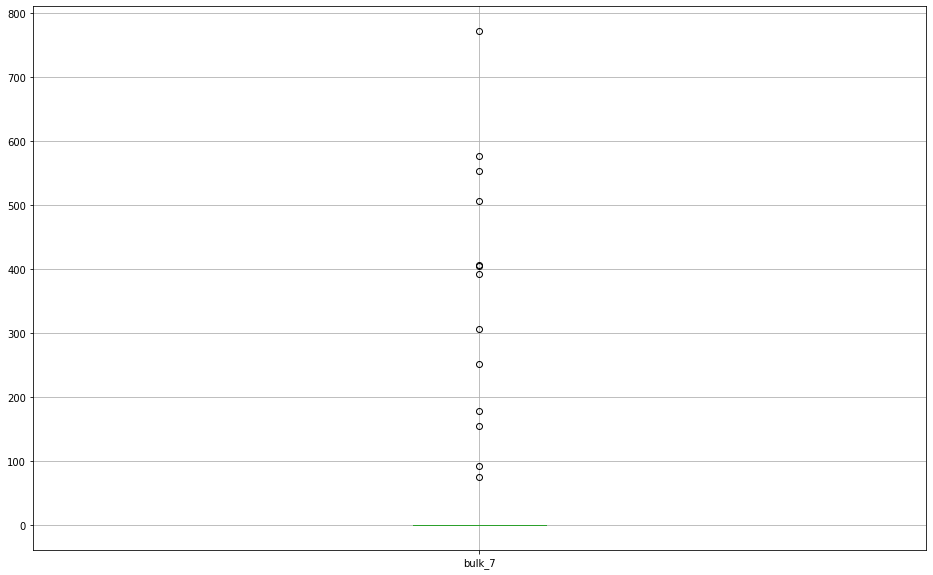

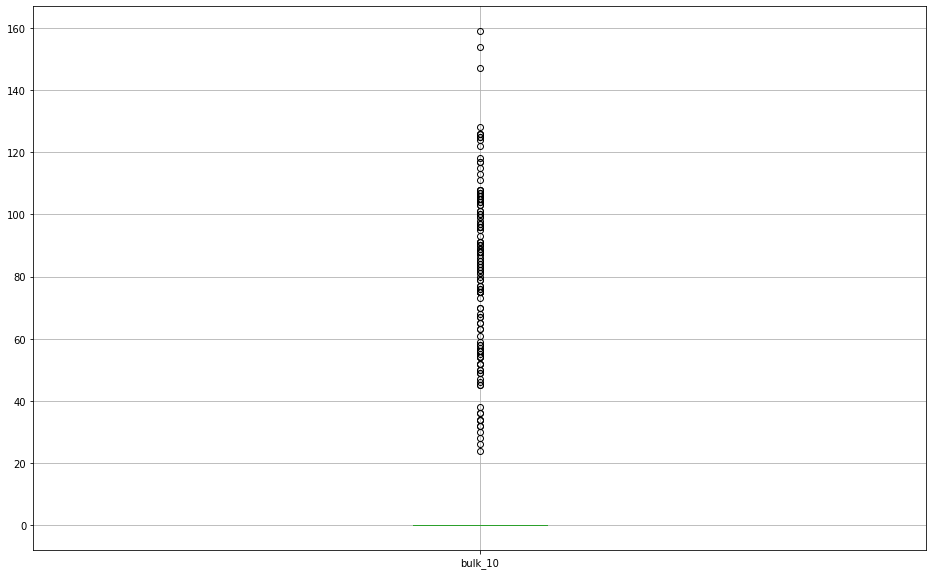

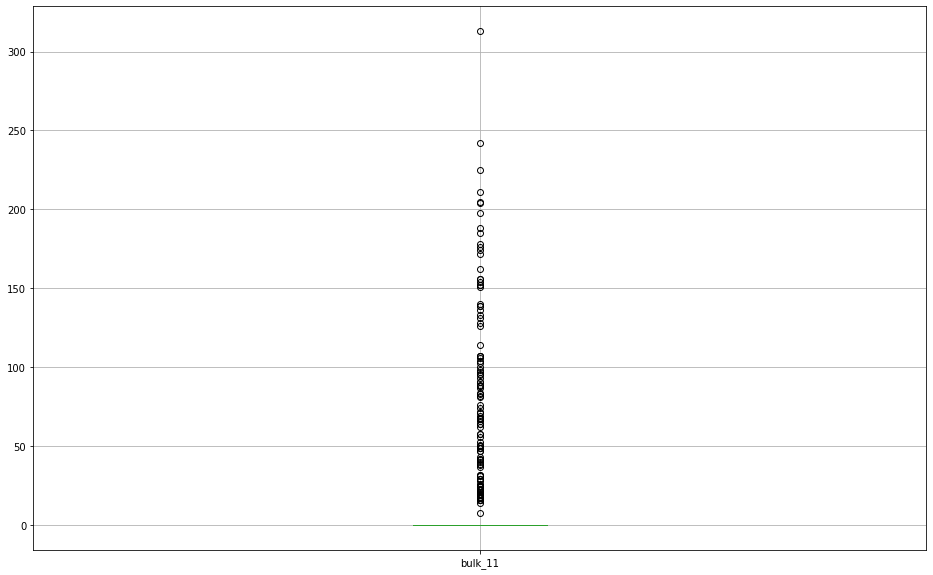

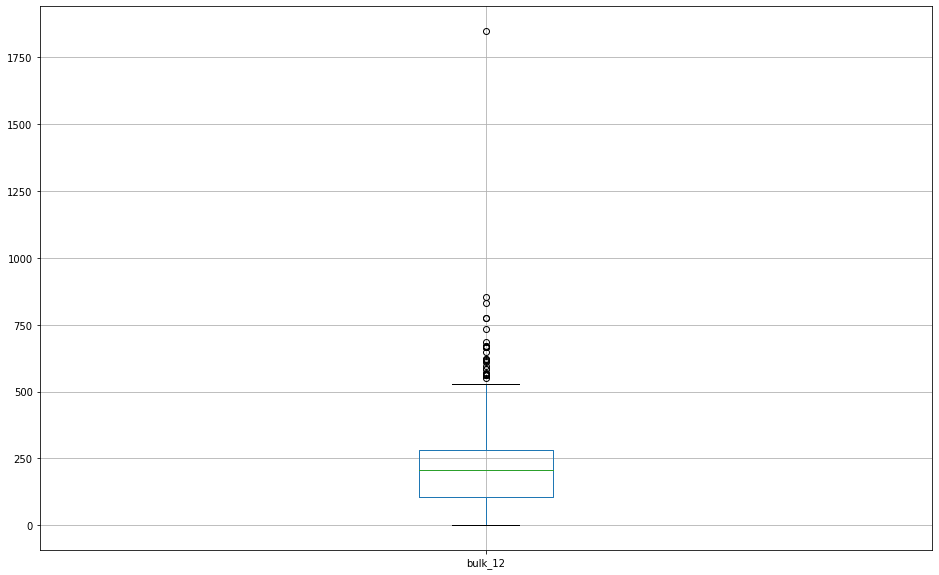

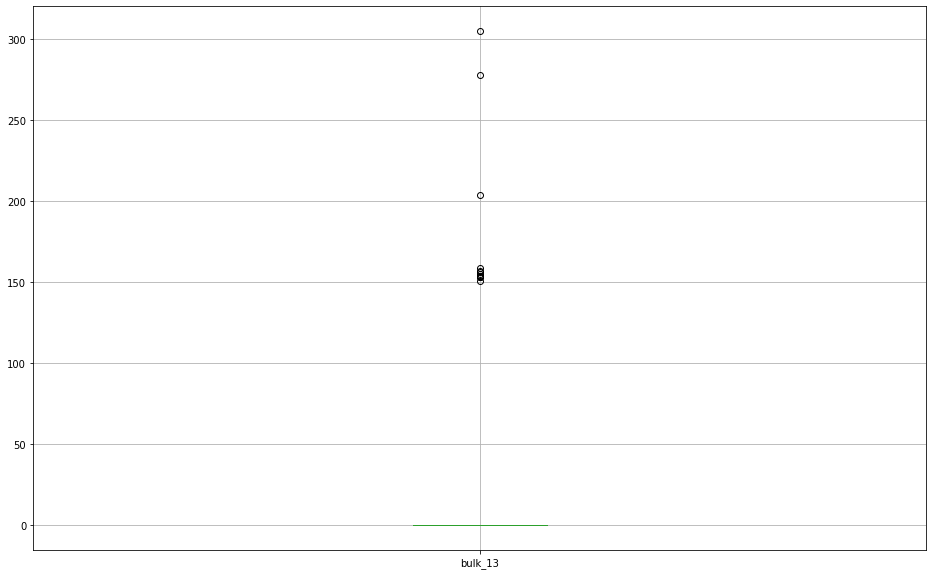

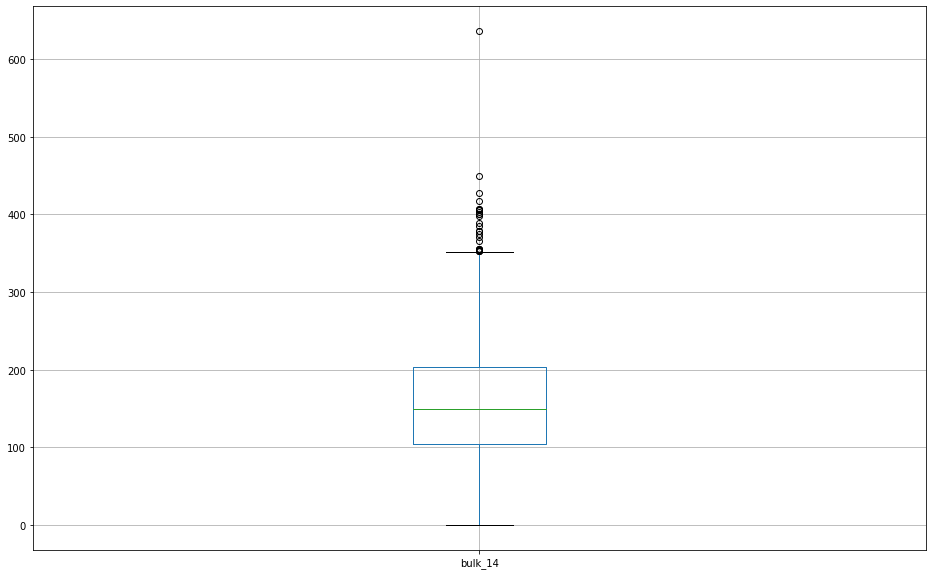

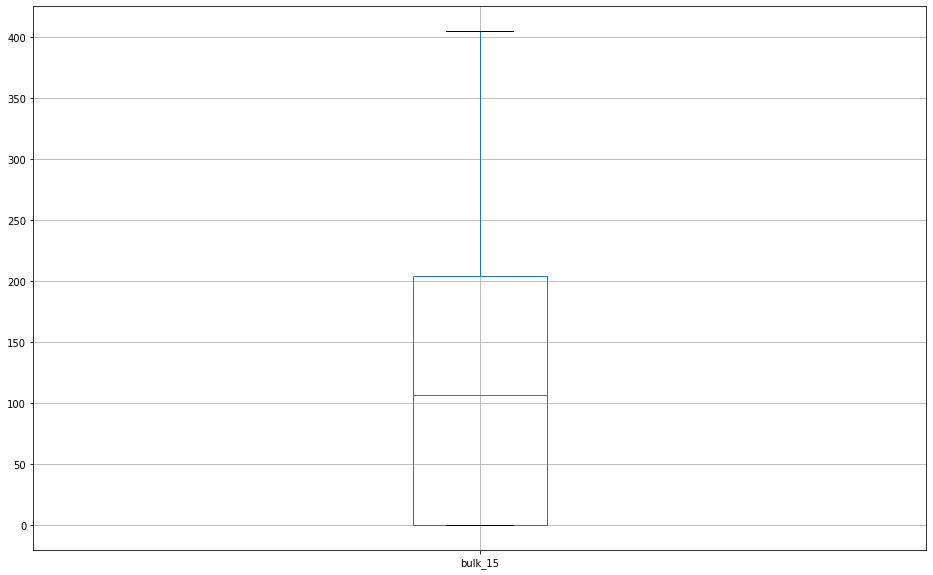

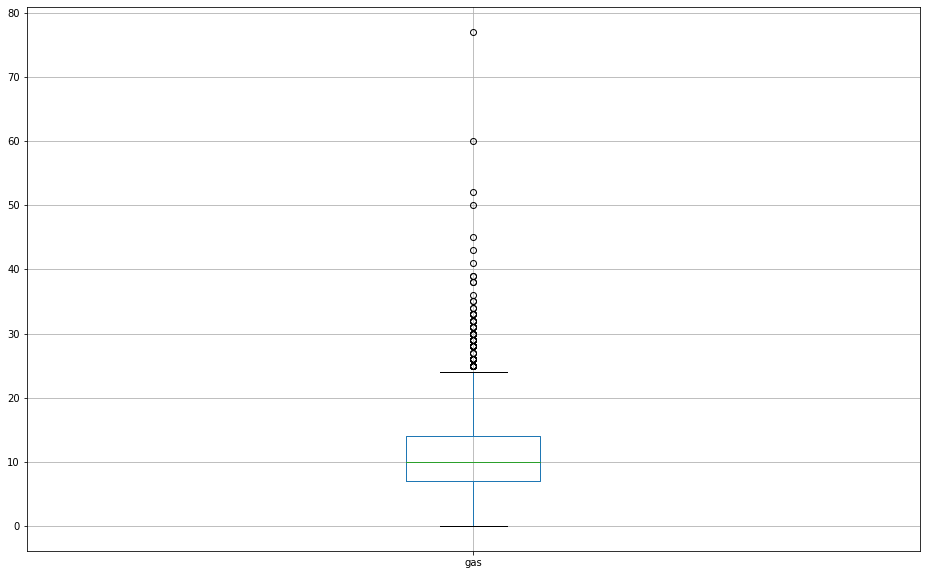

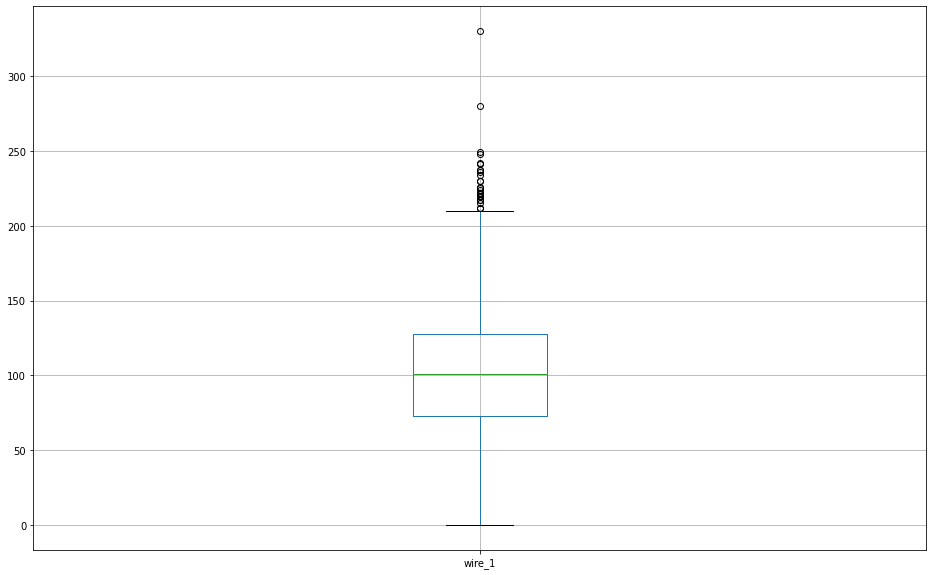

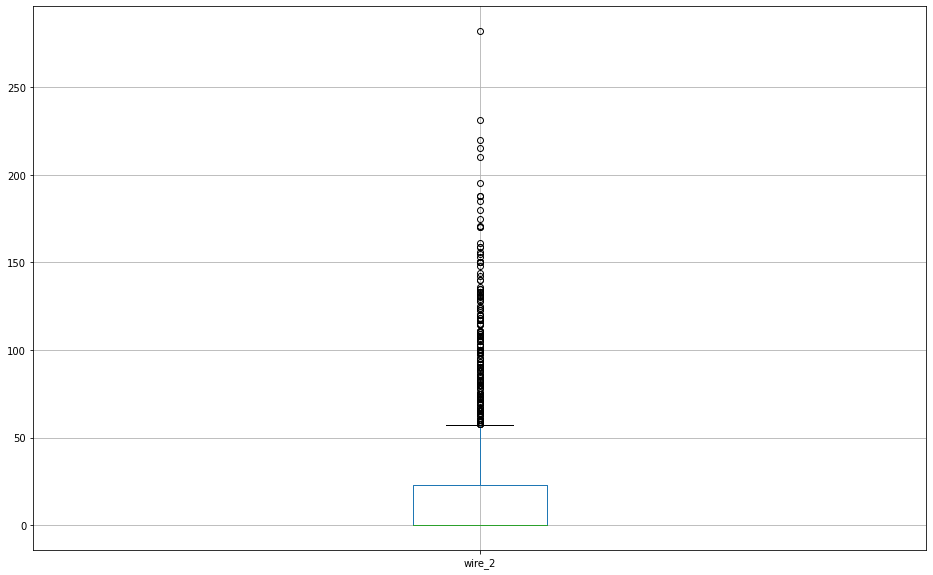

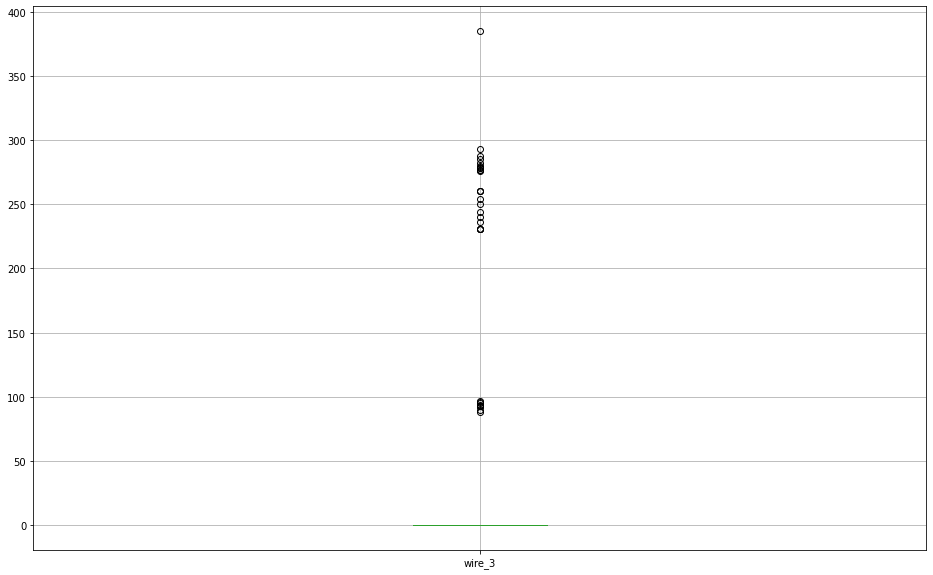

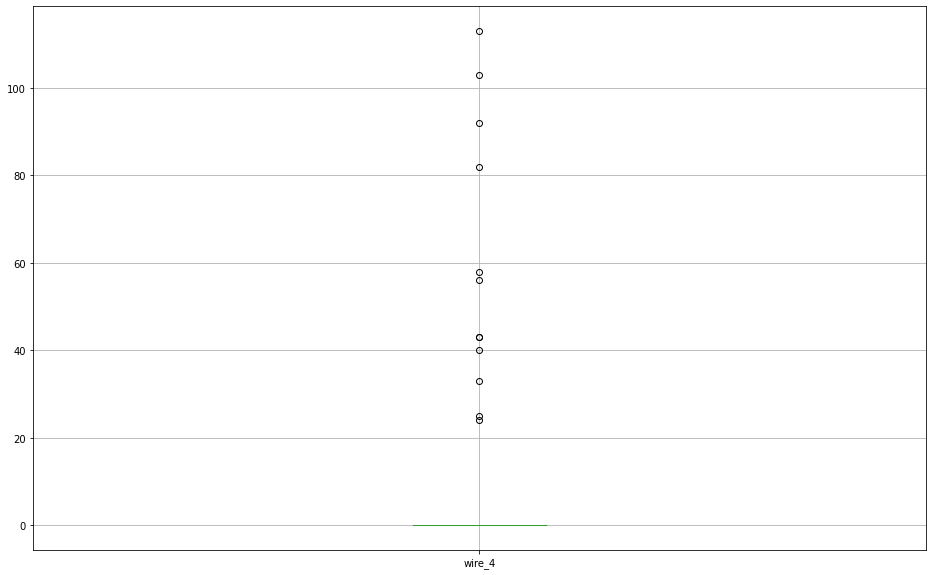

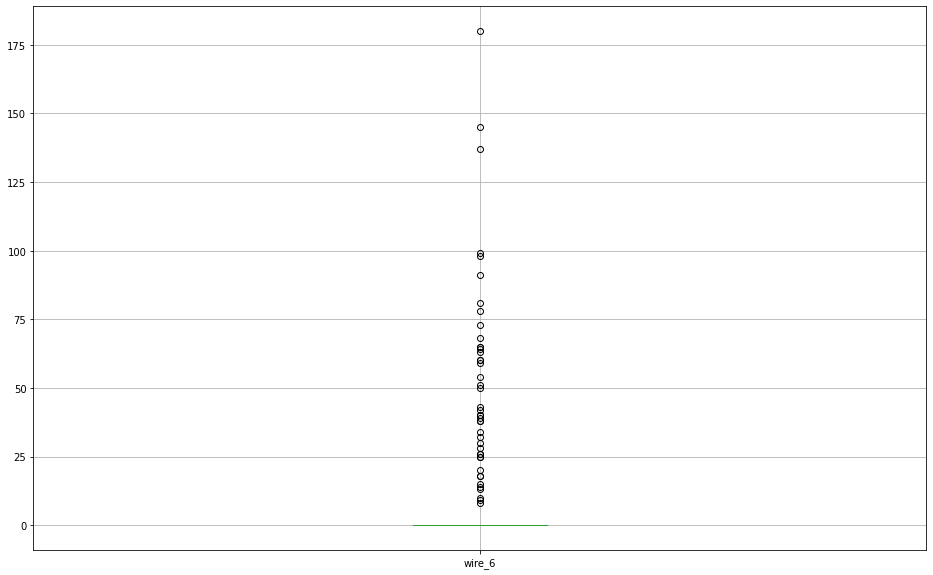

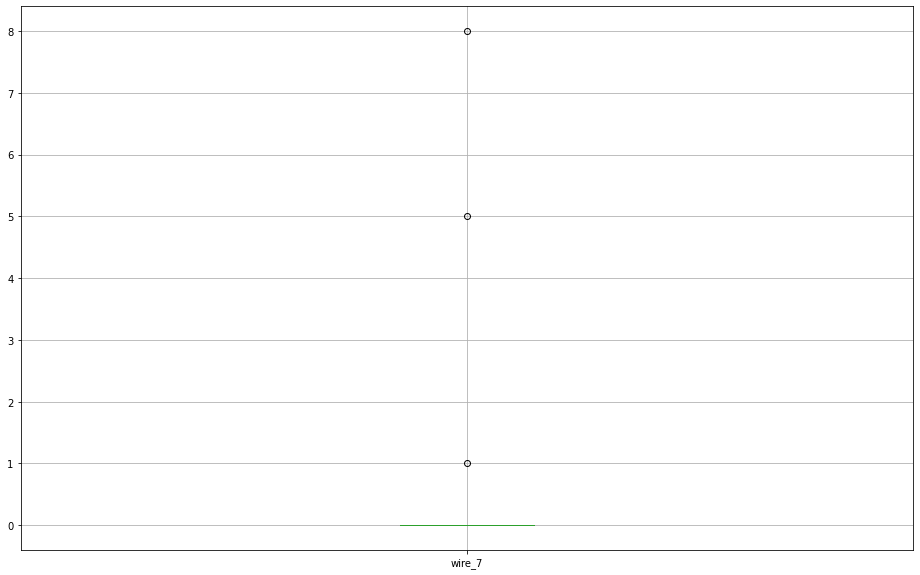

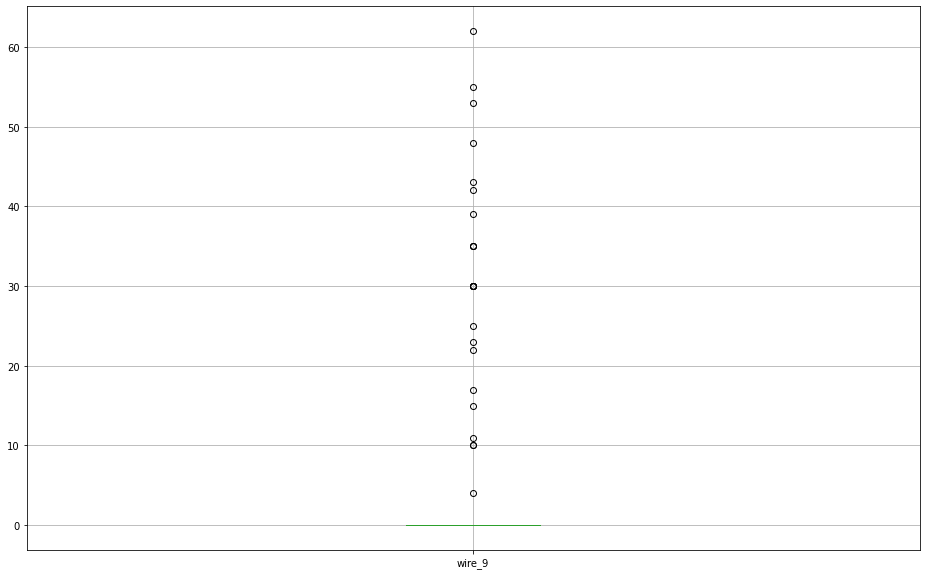

In [59]:
for column in data_all.columns:
    fig, ax= plt.subplots(figsize=(16,10))
    data_all.boxplot(column)

<div class="alert alert-info">
<font color='black'> <b>
При анализе ящиков с усами видно, что в данных имеются выбросы. Надо избавиться от аномальных значений

In [60]:
#model = KNN()
#data_all_anomaly = data_all.copy()

#data_all_anomaly['is_outlier'] =  model.fit_predict(data_all_anomaly) == 1
#outliers_knn = data_all_anomaly['is_outlier'].sum()
#display("Количество аномалий (KNN): ", outliers_knn)

#data_all=data_all_anomaly.query('is_outlier!=1')

#data_all = data_all.drop('is_outlier', axis=1)
#data_all.shape

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>    
    
    
А данный подход (KNN) к удалению выбросов выглядит неуправляемым. Т.е. берём и удаляем по какому-то правилу данные. Я бы не стал)<br>
Но ок. пусть так. НО только давай сдкелаем это только на трайн выборке!!!!! А тест будет читс от удаления. Так мы будем близки к реальным условиям.<br>
    
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригоной).<br><br>

## Обучение моделей

In [61]:
random_state = 3102022
cv_counts = 5

features = data_all.drop('end_temp', axis=1)
target = data_all['end_temp']

features_train, features_test, target_train, target_test = train_test_split(
                                                            features, 
                                                            target, 
                                                            test_size=0.25, 
                                                            random_state=random_state)

In [62]:
features.shape, features_train.shape, features_test.shape

((2329, 23), (1746, 23), (583, 23))

In [63]:
1746+583

2329

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
    <p>Дальше используется и кросс-валидация и сетка параметров - ОТЛИЧНО, так и надо. Но тогда валид выборка нам и не нужна. На трайн - ищем лучшую модель, выводя бест_скор. А потом ТОЛЬКО одну лучшую модель проверяем на тесте.</p>
    <div class="alert alert-info"> <b>Комментарий студента:</b> </b> Сделал</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>ОК

In [64]:
%%time

regressor = CatBoostRegressor(random_state=random_state)
param_cb = {'depth': [4,5,6,7],'learning_rate' : [0.01,0.02,0.03,0.04],'iterations': [10, 20,30,40,50]
                 }
model_cb = GridSearchCV(regressor, param_cb, scoring='neg_mean_absolute_error', cv=cv_counts, verbose=2)
model_cb.fit(features_train, target_train)
best_params_cb = model_cb.best_params_
#cb_best = CatBoostRegressor(**best_params_cb, random_state=random_state)
#cb_best.fit(features_train, target_train)

              

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0:	learn: 11.3868497	total: 48.4ms	remaining: 436ms
1:	learn: 11.3654206	total: 49.5ms	remaining: 198ms
2:	learn: 11.3463218	total: 50.3ms	remaining: 117ms
3:	learn: 11.3221232	total: 51.2ms	remaining: 76.8ms
4:	learn: 11.3061949	total: 52ms	remaining: 52ms
5:	learn: 11.2813386	total: 52.8ms	remaining: 35.2ms
6:	learn: 11.2585836	total: 53.7ms	remaining: 23ms
7:	learn: 11.2337792	total: 54.7ms	remaining: 13.7ms
8:	learn: 11.2153292	total: 55.6ms	remaining: 6.17ms
9:	learn: 11.1940624	total: 56.4ms	remaining: 0us
[CV] END .........depth=4, iterations=10, learning_rate=0.01; total time=   0.7s
0:	learn: 11.4085565	total: 1.08ms	remaining: 9.75ms
1:	learn: 11.3843352	total: 2.23ms	remaining: 8.94ms
2:	learn: 11.3667178	total: 3.13ms	remaining: 7.3ms
3:	learn: 11.3471824	total: 4.05ms	remaining: 6.08ms
4:	learn: 11.3267765	total: 5.05ms	remaining: 5.05ms
5:	learn: 11.3084975	total: 6.02ms	remaining: 4.01ms
6:	learn: 11.2908747	t

In [65]:
display ("CatBoostRegressor:", (model_cb.best_score_)*(-1))

'CatBoostRegressor:'

7.05402502358142

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
Как и писал выше, тут не нужна валид-выборка. Всё делаем на трайне. В гридсёрч уже зашита кросс-валидация. На просто надо вывести модель.бест_скор - это и будет метрика данной модели. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>есть!!

In [66]:
%%time

regressor = LinearRegression()
scaler = StandardScaler()
scaler.fit(features_train) 
features_train_scaled = scaler.transform(features_train)

LR = (cross_val_score(regressor, 
                             features_train_scaled, 
                             target_train, 
                             cv=cv_counts, verbose=2,
                             scoring='neg_mean_absolute_error').mean() * -1)
display('MAE of LinearRegression =', LR)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


'MAE of LinearRegression ='

7.150685177432853

CPU times: user 55.9 ms, sys: 78 ms, total: 134 ms
Wall time: 109 ms


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
Вот тут ОК. валид не используется. Лучше только среднее по метрике выводить. Зачем нам макс?<br>
    
И такой момент: для этой модели чаще всего нужно маасштабирование данных. Наши же факторы  имеют разный уровень. Поэтому оценка модели в таком случае может быть смещены. Нужно масштабировать!

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
отлично. ВОт только с масштабированием не разобрались ещё(( Как и писал, для линейных моделей это чаще всего обязательная история!

In [67]:
%%time

regressor = LGBMRegressor(random_state=random_state) 
model_lgbm = GridSearchCV(regressor, {'learning_rate':np.array([0.01, 0.02])}, scoring='neg_mean_absolute_error', cv=cv_counts, verbose=2, n_jobs=-1)
model_lgbm.fit(features_train, target_train)
best_params_lgbm = model_lgbm.best_params_
#lgbm_best = LGBMRegressor(**best_params_lgbm, random_state=random_state)
#lgbm_best.fit(features_train, target_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................learning_rate=0.01; total time= 5.2min
[CV] END .................................learning_rate=0.01; total time= 6.1min
[CV] END .................................learning_rate=0.01; total time= 1.1min
[CV] END .................................learning_rate=0.01; total time=   1.1s
[CV] END .................................learning_rate=0.01; total time=   0.9s
[CV] END .................................learning_rate=0.02; total time=   0.9s
[CV] END .................................learning_rate=0.02; total time=   0.8s
[CV] END .................................learning_rate=0.02; total time=   1.2s
[CV] END .................................learning_rate=0.02; total time=   0.9s
[CV] END .................................learning_rate=0.02; total time=   0.8s
CPU times: user 12min 18s, sys: 5.06 s, total: 12min 23s
Wall time: 12min 31s


In [68]:
display ("lightGBM:", (model_lgbm.best_score_)*(-1))

'lightGBM:'

6.793352364430989

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
    
Тааак, здесь  свалид - тоже самое, что про кэтбуст писал!<br>
    
И такой момент: params_lgbm - это просто константа. Зачем тогда в параметры перебоора вставлять? Если параметр - константа, то сразу в модель надо. А откуда исенно такой парамтер получился? как-то организовывался перебор, просто ты его удалил? Лучше оставлять, номожно закоментить.
<div class="alert alert-info"> <b>Комментарий студента:</b> </b> LGBM очень долго считает, минимизировал количество параметров</div>

In [69]:
%%time

regressor = RandomForestRegressor(random_state=random_state) 
params_rf = {'max_depth': list(range(10, 22)), 'n_estimators':list(range(30, 120, 5))}
model_rf = GridSearchCV(regressor,
                         params_rf, cv=cv_counts, n_jobs=-1, scoring = 'neg_mean_absolute_error', verbose=2) 
model_rf.fit(features_train, target_train)
params = model_rf.best_params_
#rf_best = RandomForestRegressor(**params, random_state=random_state)
#rf_best.fit(features_train, target_train)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END ......................max_depth=10, n_estimators=30; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=35; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=35; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=35; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=35; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=35; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.2s
[CV] END ......................max_depth=10, 

In [70]:
display ("RandomForestRegressor:", (model_rf.best_score_)*(-1))

'RandomForestRegressor:'

6.772493318199539

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Про валид - аналогично. И ниже - тоже!

In [71]:
%%time

regressor = XGBRegressor(random_state=random_state) 
params_xgb=[{'learning_rate':np.array([0.08, 0.1, 0.12]), 'n_estimators':list(range(80, 130, 10)), 'max_depth': [4,5,6,7]}]
model_xgb = GridSearchCV(regressor, params_xgb, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv_counts, verbose=2)
model_xgb.fit(features_train, target_train)
best_params_xgb = model_xgb.best_params_
#xgb_best = XGBRegressor(**best_params_xgb, random_state=random_state)
#xgb_best.fit(features_train, target_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=80; total time=   1.7s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=80; total time=   1.7s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=80; total time=   1.6s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=80; total time=   1.9s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=80; total time=   2.0s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=90; total time=   4.3s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=90; total time=   2.5s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=90; total time=   2.1s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=90; total time=   2.2s
[CV] END ...learning_rate=0.08, max_depth=4, n_estimators=90; total time=   2.1s
[CV] END ..learning_rate=0.08, max_depth=4, n_estimators=100; total time=   2.1s
[CV] END ..learning_rate=0.08, max_depth=4, n_e

In [72]:
display ("XGBRegressor:",(model_xgb.best_score_)*(-1))

'XGBRegressor:'

6.712187900338658

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
Верно, далее ТОЛЬКО лучшую тестируем. НО тут было бы правильнее выводить итоговую таблицу по моделям.
<div class="alert alert-info"> <b>Комментарий студента:</b> </b> Сделал</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 5</b></u></p>ОК!

In [73]:
index = ['CatBoostRegressor','LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor', 'LinearRegression']
data = {'MAE':[(model_cb.best_score_)*(-1),
                     (model_lgbm.best_score_)*(-1),
                     (model_rf.best_score_)*(-1),
                     (model_xgb.best_score_)*(-1),
                     LR]}

mae_data = pd.DataFrame(data=data, index=index)

In [74]:
mae_data

,MAE
CatBoostRegressor,7.054025
LGBMRegressor,6.793352
RandomForestRegressor,6.772493
XGBRegressor,6.712188
LinearRegression,7.150685


<div class="alert alert-info">
<font color='black'> <b>
Наилучшим образом показала себя модель XGBRegressor. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 5</b></u></p>есть общий вывод!!!!

## Проверка работы модели на тестовой выборке

In [75]:
display ("XGBRegressor:",mean_absolute_error(target_test, model_xgb.predict(features_test)))

'XGBRegressor:'

6.407350726642903

<div class="alert alert-info">
<font color='black'> <b>
Проанализируем итоговую модель на предмет важности features

,Важность признака
bulk_15,0.103120
start_temp,0.087121
wire_4,0.086126
active_power,0.081737
bulk_6,0.069649
wire_1,0.068010
wire_2,0.052798
bulk_4,0.050687
bulk_1,0.049823
gas,0.046317


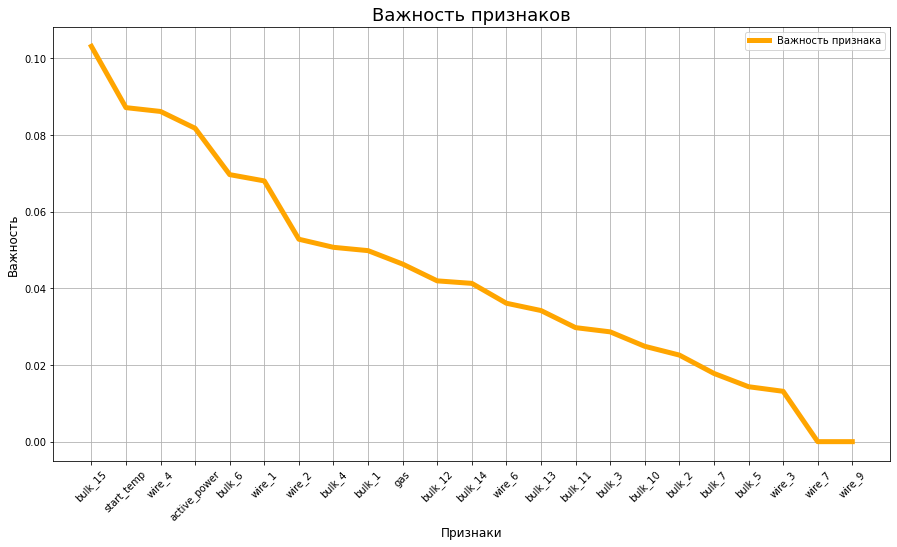

In [76]:
xgb_best = XGBRegressor(**best_params_xgb, random_state=random_state)
xgb_best.fit(features_train, target_train)
XGB=xgb_best.feature_importances_
importances=pd.DataFrame({'Важность признака': XGB}, index=features_train.columns).sort_values(by='Важность признака', ascending=False)
display(importances)
importances.plot( figsize=(15, 8), color='orange', legend=True, linewidth= 5 )
plt.title('Важность признаков', fontsize=18)
plt.xlabel('Признаки',fontsize=12)
plt.ylabel('Важность',fontsize=12)
plt.xticks(ticks=np.arange(len(importances)), labels=importances.index, rotation=45)
plt.grid()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 5</b></u></p>ДА!!! Получилось смотрибельно и аккуратно. <br>Ещё можно вот в функцию одевать построение графика. Оставил пример (кстати, столбцы выглядят рельефнее для такой задчи)<br>

In [77]:
import seaborn as sns


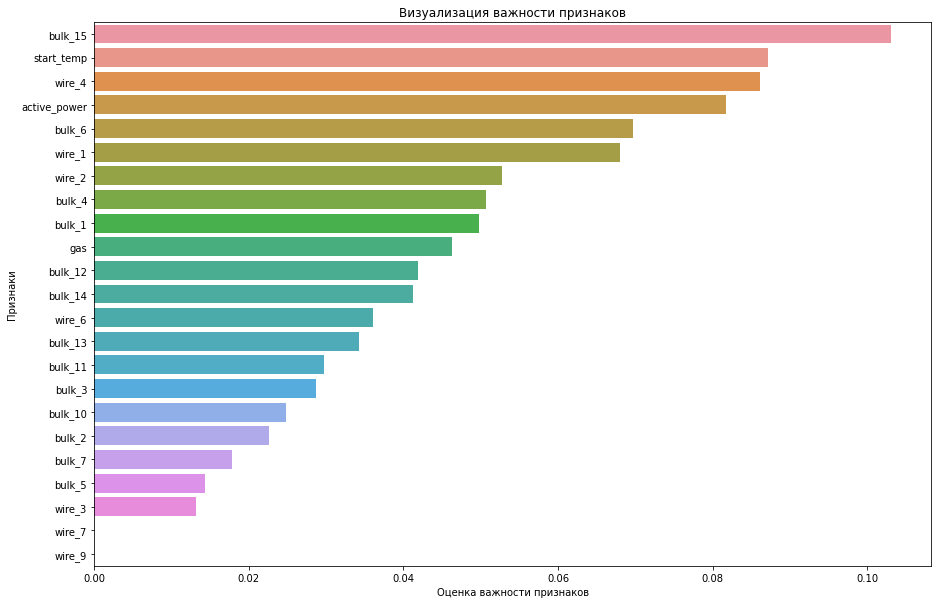

In [92]:
xgb_best = XGBRegressor(**best_params_xgb, random_state=random_state)
xgb_best.fit(features_train, target_train)
XGB=xgb_best.feature_importances_
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(15,10))
    ax = sns.barplot( x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(xgb_best)


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
Вот здесь заодно и график важности факторов надо вывести, вместе с моделью-победителем
 <div class="alert alert-info"> <b>Комментарий студента:</b> </b> Сделал (хоть в этом более менее отточил навык)</div>

<div class="alert alert-info">
<font color='black'> <b>
Наиболее важными признаками для предсказания температуры являются bulk_15, start_temp, wire_4 (топ-3).<br>Метрика МАЕ на тестовой выборке составила 6.29

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 5</b></u></p>ОК. Прогнал код - у меня вышло 6.29

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК, Александр, ещё один уверненный шаг к финалу этой истории!<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.9).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее) - написал всё в тексте ещё.<br><br>
    
2) Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br>
    
3) Плюс несколько важных жёлтых комментариев - скорректируй, пожалуйста.<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти пунктs - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.
 <div class="alert alert-info"> <b>Комментарий студента:</b> </b> Внес корректировки по замечаниям, но модели перестали работать за адекватное время (кроме кэтбуст и линейной регрессии). Прошу помочь, где что не так. И вопрос все же по выбросам: если не использовать KNN, то как адекватно почистить данные?Присадки чистить наверно не надо, мощность уже почистил, температуру надо? </div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
Привет Александр! ОК, увидел комментарии/корректировки, хорошо<br>
1) Лучше закоментить лишние строки при моделировании, как в слаке и говорили. Вот как сейчас по lgb<br>
2) По скорости: n_jobs=-1 добавили и уже быстрее всё считает) остальные - тоже приемлемо, на мой взгляд..<br>
    
По твоему вопросу о выбросах:<br>
Основное уже написал выше по этому вопросу: Супервыбросы (такие как реактивная - точно убираем). А вот с остальными: туту только после консультации с бизнесом. Надо выяснить нормальная ли это ситуация и как часто она будет возникать. После этого принимать решенеие. В нашем проекте ничего ничего больше удалять не будем).<br>
    
На что ещё надо обратить внимание:<br>
1) В линейной регрессии: всё же масштабирование для неё надо сделать.<br>
2) А для лучшей модели - создать гафик важноси факторов.<br>
Ещё хорошо бы прогнать все модели, чтобы результат был виден в тетрадке по каждому разделу.<br>
БУДУ ЖДАТЬ.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Привет, Александр!<br>
Увидел твои доработки/комментарии - ОК.<br>
Вроде все важные моменты обговорили!<br>

Ещё, всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
Тогда впереди только отчёт. Что для него важно - оставлял в общем слаке. <br>
тут такой план может быть:<br>
- решаемая задача.<br>
- описание решения (что было сделано)<br>
- результат решения (мадель, параметры, метика)<br>
- Факторы модели, включая график важности. <br>
Вот в таком виде уже будет интереснее читать каждому)<br>БУДУ ЖДАТЬ! (плюс воапросы из ноушена)<br>
    
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>

## Отчет

<div class="alert alert-info-block alert-danger" style="border-color: green; border-radius: 9px">
<font color='black'> <b>
Постановка задачи: <br> Для оптимизации производственных расходов, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Требуется построить модель, которая предскажет температуру стали.

<div class="alert alert-info" style="border-color: green; border-radius: 9px">
<font color='black'> <b>
Описание процесса обработки стали: <br>Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

<div class="alert alert-info-block alert-warning" style="border-color: green; border-radius: 9px">
<font color='black'> <b>
Данные для построения модели состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

<div class="alert alert-info" style="border-color: green; border-radius: 9px">
<font color='black'> <b> 
В ходе решения задачи было выполнено следующее: <br> 
<i>1) Проведен анализ входных данных. Изучены распределение данных с помощью графического представления, тип входных данных, наличие пропусков, дубликатов. Также был произведен анализ аномальных значений во входных данных, произведена предобработка и чистка данных
<br/><br/>
2) Были подготовлены признаки для обучения модели. Составлена общая таблица с признаками и целевым признаком как последним замером температуры в серии замеров. Полученные признаки были оценены на предмет корреляции между собой, а также с целевым признаком. Признаки со слабым влияием на целевой признак, а также мультиколлинеарный признак были удалены.  
<br/><br/>
3) Подготовленный датасет был разделен на тренировочную и тестовую выборки. Для обучения были выбраны следующие модели:
    
- `CatBoostRegressor` 
- `LGBMRegressor`
- `RandomForestRegressor` 
- `XGBRegressor` 
- `LinearRegression`
    
Методом GridSearchCV были подобраны оптимальные гиперпараметры для каждой работающей модели.<br/> Цель - получение минимальной метрики МАЕ. Наилучший результат был достигнут при обучении модели `XGBRegressor`: метрика МАЕ составила 6.74. Параметры лучшей модели: 'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 80  <i>

<div class="alert alert-info" style="border-color: green; border-radius: 9px">
<font color='black'> <b> 
Модель 'XGBRegressor' , показавшая лучший результат на предыдущем этапе, была применена на входных тестовых данных. Метрика МАЕ составила 6.4. Этот результат показывает, что модель в среднем ошибается на 6 градусов температуры.

<div class="alert alert-info" style="border-color: green; border-radius: 9px">
<font color='black'> <b> 
Для модели 'XGBRegressor' составлен график и определен рейтинг признаков по влиянию на итоговое значение температуры . В топ-3 по рейтингу вошли присадки bulk_15, wire_4, а также начальная температура start_temp. (График приведен ниже)

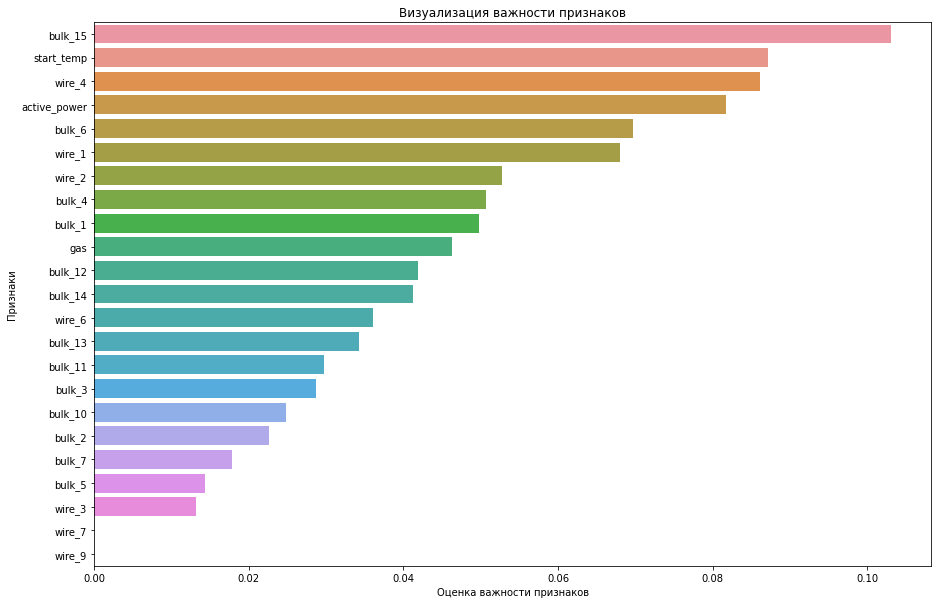

<div class="alert alert-info-block alert-danger" style="border-color: green; border-radius: 9px">
<font color='black'> <b>
<i>По итогу выполнения работы можно отметить следующее: <br>
1) Все пункты намеченного плана были выполнены: был произведен анализ данных и их обработка, была выполнена подготовка данных к обучению, был выделен целевой признак, были обучены различные модели регрессии, выбрана лучшая модель <br><br>
2) Самая большая трудность заключалась в оценке входных данных и подготовке признаков ввиду большого объема и довольно непростого технологического процесса обработки стали. Обучение моделей не составило большого труда, однако процесс обучения модели занял определенное количество времени. <br><br>
3) Ключевыми и самыми сложными шагами в решении задачи явились обработка входных данных, выделение целевого признака и создание итоговой единой таблицы с признаками<br><br>
4) Итоговая модель -  'XGBRegressor' . Метрика МАЕ - 6.4. <br>
   Гиперпараметры итоговой модели: 
    
- 'learning_rate': 0.12,
- 'max_depth': 4, 
- 'n_estimators': 80

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 7</b></u></p>
    <p>Привет, Александр!<br>
интересный дизайн с отчётом! ОК.<br>
Тут пару моментов осталось:<br>
1) График лучше вставлять картинкой сразу. Тут уже кода не надо. (и лучше именно столбчатые графики)<br>
2) Также нам надо указать параметры самой модели-победителе.<br>
        
БУДУ ЖДАТЬ!
</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 8</b></u></p>
Привет Александр!<br>
Поздравляю с получением диплома о новой специальности!!!!<br>    
Картинка с фаткорами на месте)).<br>
    
Добавлю вот что ещё: изучение бизнес-процессов заказчика - очень важный этап, который может вызывать сложности. Но без этого в нашей работа не обойтись. Можно сказать - вскрывать особенности процессов заказчика - часть нашей работы. Ведь замоделировать можно только то, что понимаешь). Также, хотел бы отметить твою графическую работу. Она  подкрепляла аналитику. На защите заказчику - хорошая графика - может прибавить дополнительной лояльности. Поэтому, стоит её улублять и дальше. Например сиборн библиотека.<br><br>
    
Далее скажу, что стараюсь говорить всем на финале.<br>
Пройден большой путь. Со своими коcогорами и равнинами, медианами и дисперсиями)<br>
Умение аналитически мыслить, писать красивый код, эффективно автоматизировать расчёты, видеть задачи бизнеса через призму моделирования - вот то основное, что  останется у тебя важного после нашей школы. А дальше - только взращивать посеянные зёрна и укреплять свои скилы.<br><br>
Если говорить о развитии дополнительных компетенций, рекомендовал бы ещё глянуть такие области знаний:<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)"<br>
4) Ещё важный навык: перевод результататов моделирования на язык бизнеса. Т.е. понимание, как целевые показатели моделей влияют на финансовую выгоду заказчика.<br>
5) Если говорить о модельных рекоммендациях, то есть ещё такие способы как блендинг и стакинг разных моделей.<br><br>

Каждого из нас (и меня в том числе) можно оценивать с нескольких сторон, как специалиста.<br>
1) Умение анализировать, "вгрызание" в данные, в задачу.<br>
2) Знание мат.части: методы, подходы к решению - всё, что по программе заложено<br>
3) Кодовая часть: умение писать эффективный код.<br>
4) Работа с графикой. (умение хорошо ыизуализировать)<br>
И при рабочей деятельности (устраивание на работу/ улучшение карьеры) на важно понимать свои слабые/сильные стороны по этим направлениям. И опираться на них при ведении переговоров и выстраивании дальнейшего совершенствования.<br><br>    
    
УСПЕХОВ!<br>
Спасибо)<br>